In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
warnings.filterwarnings("ignore")

In [3]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

## Récupération des données

In [4]:
data_2015 = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\2016-building-energy-benchmarking.csv')

In [7]:
data_2016['Address'].nunique()

3354

In [25]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [185]:
data_2015.shape

(3340, 40)

In [186]:
data_2016.shape

(3376, 41)

In [13]:
data_2015.columns[~data_2015.columns.isin(data_2016.columns)]

Index(['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'City Council Districts', 'SPD Beats', 'Zip Codes'],
      dtype='object')

In [14]:
data_2016.columns[~data_2016.columns.isin(data_2015.columns)]

Index(['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude',
       'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

Building en communs dans le jeu de données 2015 et 2016

In [244]:
data_2015[data_2015['OSEBuildingID'].isin(data_2016['OSEBuildingID'].values)].shape[0]

3284

In [248]:
data_2016[data_2016['OSEBuildingID'].isin(data_2015['OSEBuildingID'].values)].shape[0]

3284

Building non présent sur le fichier 2016 par rapport à ceux de 2015

In [246]:
data_2015[~data_2015['OSEBuildingID'].isin(data_2016['OSEBuildingID'].values)].shape[0]

56

Building non présent sur le fichier 2015 par rapport à ceux de 2016

In [249]:
data_2016[~data_2016['OSEBuildingID'].isin(data_2015['OSEBuildingID'].values)].shape[0]

92

## Métadonnées

In [15]:
import json  
from pandas.io.json import json_normalize 

In [69]:
with open('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\socrata_metadata_2015-building-energy-benchmarking.json') as jsonfile:
    metadata_2015_json = json.load(jsonfile)
    metadata_2015 = json_normalize(metadata_2015_json)

with open('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\socrata_metadata_2016-building-energy-benchmarking.json') as jsonfile:
    metadata_2016_json = json.load(jsonfile)
    metadata_2016 = json_normalize(metadata_2016_json)

<ipython-input-69-6508ec571591>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  metadata_2015 = json_normalize(metadata_2015_json)
<ipython-input-69-6508ec571591>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  metadata_2016 = json_normalize(metadata_2016_json)


In [20]:
metadata_2016.columns

Index(['id', 'name', 'assetType', 'attribution', 'attributionLink',
       'averageRating', 'createdAt', 'description', 'displayType',
       'downloadCount', 'hideFromCatalog', 'hideFromDataJson',
       'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid',
       'provenance', 'publicationAppendEnabled', 'publicationDate',
       'publicationGroup', 'publicationStage', 'rowIdentifierColumnId',
       'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated',
       'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns',
       'grants', 'rights', 'tags', 'flags', 'license.name',
       'metadata.sidebar.width',
       'metadata.custom_fields.Department.Department',
       'metadata.custom_fields.Refresh Frequency.Frequency',
       'metadata.rowIdentifier', 'metadata.rowLabel',
       'metadata.availableDisplayTypes',
       'metadata.renderTypeConfig.visible.table', 'owner.id',
       'owner.displayName', 'owner.screenName', 'owner.type', 'owner.f

In [21]:
metadata_2015.columns[~metadata_2015.columns.isin(metadata_2016.columns)]

Index(['metadata.rdfSubject', 'metadata.jsonQuery.order', 'query.orderBys'], dtype='object')

In [22]:
metadata_2016.columns[~metadata_2016.columns.isin(metadata_2015.columns)]

Index(['rowIdentifierColumnId', 'metadata.sidebar.width',
       'metadata.rowIdentifier', 'metadata.rowLabel'],
      dtype='object')

In [24]:
metadata_2016

id                               name assetType      attribution  \
0  2bpz-gwpy  2016 Building Energy Benchmarking   dataset  City of Seattle   

                              attributionLink  averageRating   createdAt  \
0  https://www.seattle.gov/energybenchmarking              0  1521070051   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  \
0  Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\nPer Ordinance (125000), starting with 2015 energy use performance reporting, the City of Seattle will make the data for all building 20,000 SF and larger available annually. This update to the benchmarking mandate was passed by Seattle City Council on February 29, 2016.\n\nIf you have questions or comments on the data, email us at energybenchmarking@seattle.gov and include Open Data in the subject line.   

  displayType  downloadCount  hideFromCatalog  hideFromDataJson  \
0       table           2331            False             False   

   indexUpdatedAt      licenseId  newBackend  numberOfComments       oid  \
0      1521490072  PUBLIC_DOMAIN        True                 0  28218043   

  provenance  publicationAppendEnabled  publicationDate  publicationGroup  \
0   official                     False       1521071079          14936543   

  publicationStage  rowIdentifierColumnId  rowsUpdatedAt rowsUpdatedBy  \
0        published              349768636     1521071078     9yyf-ecsx   

    tableId  totalTimesRated  viewCount  viewLastModified viewType  \
0  14936543                0       3345        1618951870  tabular   

                                                                                                                                                                                                                                                                                                                                                                                                                                      approvals  \
0  [{'reviewedAt': 1521071079, 'reviewedAutomatically': True, 'state': 'approved', 'submissionId': 331104, 'submissionObject': 'public_audience_request', 'submissionOutcome': 'change_audience', 'submittedAt': 1521071079, 'workflowId': 623, 'submissionDetails': {'permissionType': 'READ'}, 'submissionOutcomeApplication': {'failureCou

In [82]:
pd.DataFrame(metadata_2015['columns'].values.tolist()[0])['name'].unique()

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultD

In [86]:
print(data_2016.columns[data_2016.columns.isin(pd.DataFrame(metadata_2016['columns'].values.tolist()[0])['name'].unique())])
print(data_2016.columns[~data_2016.columns.isin(pd.DataFrame(metadata_2016['columns'].values.tolist()[0])['name'].unique())])


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [87]:
print(data_2015.columns[data_2015.columns.isin(pd.DataFrame(metadata_2015['columns'].values.tolist()[0])['name'].unique())])
print(data_2015.columns[~data_2015.columns.isin(pd.DataFrame(metadata_2015['columns'].values.tolist()[0])['name'].unique())])

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les colonnes de chaque dataframe correspondent bien à ceux renseignées dans le fichier des metadatas pour l'année respective.

## Colonnes inutiles à notre analyse

Colonnes n'apportant pas d'information sur la consommation d'energie: ville, état, nom de la propriété, identifiant, année des données, données de la police (SPD Beats), etc.

In [172]:
data_2015['ListOfAllPropertyUseTypes']
#Information en doublon
#Pour la forme, vérifier s'il existe un enregistrement avec plus de 3 utilisations

0                               Hotel
1          Hotel, Parking, Restaurant
2       Hotel, Parking, Swimming Pool
3                               Hotel
4       Hotel, Parking, Swimming Pool
                    ...              
3335              Multifamily Housing
3336              Multifamily Housing
3337     Multifamily Housing, Parking
3338              Multifamily Housing
3339              Multifamily Housing
Name: ListOfAllPropertyUseTypes, Length: 3340, dtype: object

In [192]:
data_2015['DefaultData'].value_counts()

No     2791
Yes     548
Name: DefaultData, dtype: int64

In [193]:
len(data_2015['SPD Beats'].unique())

52

Il s'agit de l'id de groupement d'immeuble (beats). Nous n'avons pas besoin de cette colonne.

In [361]:
columns_2016_to_drop = [
                   'City', #1 unique valeur
                   'State', #1 unique valeur
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes    
                   'DefaultData', #utilité de la variable inconnue
                    'Address' #non conservé (latitude et longitude ou ZipCode),
    'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'
                   
                  ] 
columns_2015_to_drop = ['OtherFuelUse(kBtu)',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'
                        ,
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes                   
                   'SPD Beats', #données police / trop d'infos manquantes
                   'DefaultData',
                        'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'
                  ] 

In [362]:
def filter_columns(data, columns_list):
    data.drop(columns=columns_list, inplace=True)
    

In [363]:
filter_columns(data_2015, columns_2015_to_drop)
filter_columns(data_2016, columns_2016_to_drop)

In [359]:
data_2015_copy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

## Identification des colonnes NaN

### Colonnes peu pertinentes à supprimer

In [254]:
def getColumnsToDel(data, seuil):
    columnsToDel = []
    for col in data.columns:         
        txNaN = data[col].isna().sum()/data.shape[0]
        if txNaN > seuil:
            columnsToDel.append(col)
            print(f'{col:-<70}{txNaN}')
    return columnsToDel  


In [364]:
data_2015['Outlier'].fillna('Non Outlier', inplace=True)
data_2016['Outlier'].fillna('Non Outlier', inplace=True)

In [365]:
columnsToDel_2015 = getColumnsToDel(data_2015, 0.7)

ThirdLargestPropertyUseType-------------------------------------------0.8323353293413174
ThirdLargestPropertyUseTypeGFA----------------------------------------0.8323353293413174
YearsENERGYSTARCertified----------------------------------------------0.9670658682634731
Comment---------------------------------------------------------------0.9961077844311377
2010 Census Tracts----------------------------------------------------0.932934131736527
City Council Districts------------------------------------------------0.9362275449101797


In [366]:
columnsToDel_2016 = getColumnsToDel(data_2016, 0.7)

ThirdLargestPropertyUseType-------------------------------------------0.8234597156398105
ThirdLargestPropertyUseTypeGFA----------------------------------------0.8234597156398105
YearsENERGYSTARCertified----------------------------------------------0.9647511848341233
Comments--------------------------------------------------------------1.0


In [367]:
def delColumns(data, columnsList):
    print('Nombre de colonnes avant suppression: ', data.columns.shape[0])
    data.drop(columns=columnsList, inplace=True)
    print('Nombre de colonnes après suppression: ', data.columns.shape[0])
    

In [368]:
delColumns(data_2015, columnsToDel_2015)

Nombre de colonnes avant suppression:  39
Nombre de colonnes après suppression:  33


In [369]:
delColumns(data_2016, columnsToDel_2016)

Nombre de colonnes avant suppression:  39
Nombre de colonnes après suppression:  35


In [370]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Location', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'ComplianceStatus', 'Outlier'],
      dtype='object')

### Remplacement des NaN

In [371]:
columnsWithNans=getColumnsToDel(data_2015, 0.1)

SecondLargestPropertyUseType------------------------------------------0.5332335329341318
SecondLargestPropertyUseTypeGFA---------------------------------------0.5332335329341318
ENERGYSTARScore-------------------------------------------------------0.23353293413173654


In [348]:
data_2015[data_2015['SecondLargestPropertyUseTypeGFA'].isna()][~data_2015['SecondLargestPropertyUseType'].isna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Outlier


On voit que les immeubles n'ayant pas de type d'utilisation secondaire sont ceux qui n'ont pas de surface pour le type d'utilisation secondaire.
Il s'agit alors très probablement d'immeuble à utilisation unique (ex:Hotel sans Parking, Police Station....).
Nan peut être utilisé comme une catégorie à part entière (on change juste le libellé).Il faut aussi remplacer les NaN de la colonne SecondLargestPropertyUseTypeGFA.

In [372]:
data_2015['SecondLargestPropertyUseType'].fillna('No information', inplace=True)
data_2015['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

In [373]:
print(data_2015['SecondLargestPropertyUseTypeGFA'].isna().sum())
print(data_2015['SecondLargestPropertyUseType'].isna().sum())

0
0


In [374]:
columnsWithNans=getColumnsToDel(data_2015, 0.1)

ENERGYSTARScore-------------------------------------------------------0.23353293413173654


In [375]:
getColumnsToDel(data_2016, 0.1)

SecondLargestPropertyUseType------------------------------------------0.5026658767772512
SecondLargestPropertyUseTypeGFA---------------------------------------0.5026658767772512
ENERGYSTARScore-------------------------------------------------------0.2497037914691943


['SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore']

In [376]:
data_2016['SecondLargestPropertyUseType'].fillna('No information', inplace=True)
data_2016['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

In [377]:
getColumnsToDel(data_2016, 0.1)

ENERGYSTARScore-------------------------------------------------------0.2497037914691943


['ENERGYSTARScore']

## Traitement des données dupliquées

In [145]:
data_2015.duplicated().sum()

0

In [146]:
data_2016.duplicated().sum()

0

Aucune données dupliquées.

### GHGEmissionIntensity

In [218]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [219]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [220]:
data_2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [221]:
data_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

L'unité des émissions de dioxyde de carbone n'est pas connue pour l'année 2016 mais en observant les ordres de grandeurs comparé aux données de 2015, on peut deviner que le TotalGHGEmission correspond au total d'émission de CO2 par population et le GHGEmissionIntensity  correspond au total de CO2 par feet au carré.

In [378]:
data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
data_2015['GHGEmissionsIntensity'] = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)

### Assemblage des 2 dataframes

In [379]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data_2015.columns) - set(data_2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data_2016.columns) - set(data_2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'Location'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'ZipCode', 'Latitude', 'Longitude'}


In [228]:
data_2015['Zip Codes'].unique()

array([18081, 19576, 18379, 18800, 18383, 18789, 19579, 18390, 18377,
       18235, 18792, 18386, 17919, 19575, 19578, 19581, 19582, 17920,
       18385, 18388, 19584, 18798, 17916, 18795, 17923, 17926, 18229,
       18376, 18230], dtype=int64)

In [227]:
data_2016['ZipCode'].unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [232]:
colonnes_2015 = pd.DataFrame(metadata_2015['columns'].values.tolist()[0])
colonnes_2016 = pd.DataFrame(metadata_2016['columns'].values.tolist()[0])

In [231]:
colonnes_2015[colonnes_2015['name'] == 'Zip Codes']

,id,name,dataTypeName,description,fieldName,position,renderTypeName,tableColumnId,width,cachedContents,format,computationStrategy
46,350404106,Zip Codes,number,NaN,:@computed_region_q256_3sug,51,number,62603795,NaN,NaN,{},"{'source_columns': ['location'], 'type': 'georegion_match_on_point', 'parameters': {'region': '_q256-3sug', 'primary_key': '_feature_id'}}"


In [233]:
colonnes_2016[colonnes_2016['name'] == 'ZipCode']

,id,name,dataTypeName,description,fieldName,position,renderTypeName,tableColumnId,cachedContents,format,width
8,349768610,ZipCode,number,Property zip,zipcode,9,number,62418315,"{'largest': '98272', 'non_null': 3360, 'average': '98116.94910714286', 'null': 16, 'top': [{'item': '98101', 'count': 20}, {'item': '98121', 'count': 19}, {'item': '98104', 'count': 18}, {'item': '98118', 'count': 17}, {'item': '98105', 'count': 16}, {'item': '98112', 'count': 15}, {'item': '98125', 'count': 14}, {'item': '98109', 'count': 13}, {'item': '98108', 'count': 12}, {'item': '98199', 'count': 11}, {'item': '98115', 'count': 10}, {'item': '98107', 'count': 9}, {'item': '98144', 'count': 8}, {'item': '98103', 'count': 7}, {'item': '98119', 'count': 6}, {'item': '98136', 'count': 5}, {'item': '98122', 'count': 4}, {'item': '98126', 'count': 3}, {'item': '98133', 'count': 2}, {'item': '98106', 'count': 1}], 'smallest': '98006', 'sum': '329672949'}","{'precisionStyle': 'standard', 'noCommas': 'true', 'align': 'right'}",100.0


In [358]:
#data_2016.columns[~data_2016.columns.isin(data_2015.columns)]
data_2015.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

Ajoutons le zipcode la latitude et la longitude à la data_2015

In [380]:
def transform_columns (dataframe):
           
    #ajout des informations des colonnes manquantes
    location = pd.DataFrame()
    for line, building_id in zip(data_2015['Location'], data_2015['OSEBuildingID']):
        line = ast.literal_eval(line)
        line = json_normalize(line)
        
        latitude = line['latitude'][0]
        longitude = line['longitude'][0]

        line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
        location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,                       
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
    return pd.merge(dataframe, location, left_on = 'OSEBuildingID', 
                    right_on = 'Building_id').drop(['Building_id','Location'],axis=1)

In [381]:
data_2015 = transform_columns(data_2015)

In [382]:
data_2016.columns[~data_2016.columns.isin(data_2015.columns)]

Index([], dtype='object')

In [383]:
data_2015.columns[~data_2015.columns.isin(data_2016.columns)]

Index([], dtype='object')

La colonne OtherFuelUse(kBtu) n'est présente que pour les données 2015 et, de plus est différente de 0 pour moins de 1%. Elle n'est pas pertinente. De plus, la colonne 'Seattle Police Department Micro Community Policing Plan Areas' ne contient qu'un quadrillage de la région pour des besoins policiers. Et le 'Zip Codes' est en fait un géocoding.
Nous rajoutons  ces 3 colonnes à la liste des colonnes à supprimer de notre data_2015.

In [314]:
columns_2015_to_drop = ['OtherFuelUse(kBtu)',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'
                        ,
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes
                   'DataYear', 
                   'SPD Beats', #données police / trop d'infos manquantes
                   'DefaultData'                   
                  ] 

In [313]:
#filter_columns(data_2015, columns_2015_to_drop)

In [385]:
data_2016.columns[~data_2016.columns.isin(data_2015.columns)]

Index([], dtype='object')

In [386]:
data_2015.columns[~data_2015.columns.isin(data_2016.columns)]

Index([], dtype='object')

Nos deux jeux de données contiennent maintenant les mêmes informations. Nous pouvons effectuer concaténer les deux jeux de données.

In [387]:
data = pd.concat([data_2015, data_2016], axis=0, sort=False)

In [388]:
data[data['OSEBuildingID'] == 8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ZipCode,Latitude,Longitude
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,67.0,120.100000,122.100000,228.800000,227.100000,14829099.0,15078243.0,0.0,1777841.000,6066245.0,87631.00000,8763105.0,Compliant,Non Outlier,507.70,4.02,98121,47.6137544,-122.3409238
4,8,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,Hotel,123445.0,Parking,68009.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.0,1573448.625,5368607.0,88039.98438,8803998.0,Compliant,Non Outlier,505.01,2.88,98121.0,47.61375,-122.34047


In [333]:
data.shape

(6716, 34)

### Examen des types de colonnes

In [65]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SourceEUI(kBtu/sf)                 float64
SourceEUIWN(kBtu/sf)               float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kB

In [64]:
for col in data.select_dtypes('object'):
    print(f'{col:-<40}{data[col].nunique()}')

BuildingType----------------------------8
PrimaryPropertyType---------------------32
Neighborhood----------------------------19
LargestPropertyUseType------------------57
SecondLargestPropertyUseType------------51
ComplianceStatus------------------------5
Outlier---------------------------------5
Latitude--------------------------------6123
Longitude-------------------------------5882


In [60]:
import numpy as np
from sklearn.impute import KNNImputer
np.set_printoptions(suppress=True)
X= data[['Latitude', 'Longitude', 'ZipCode']]
imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=[['Latitude', 'Longitude', 'ZipCode']])

X ['ZipCode'] = X['ZipCode'].astype('int64')

X


,Latitude,Longitude,ZipCode
0,47.612190,-122.337997,98101
1,47.613106,-122.333358,98101
2,47.613349,-122.337699,98101
3,47.614216,-122.336609,98101
4,47.613754,-122.340924,98121
...,...,...,...
6711,47.567220,-122.311540,98108
6712,47.596250,-122.322830,98104
6713,47.636440,-122.357840,98114
6714,47.528320,-122.324310,98108


In [66]:
data['Latitude'] = data['Latitude'].astype('float64')

In [67]:
data['Longitude'] = data['Longitude'].astype('float64')

In [72]:
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('category')

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

In [69]:
for col in data.select_dtypes('object'):
    data[col] = data[col].astype('category')

In [70]:
data.dtypes

OSEBuildingID                         int64
DataYear                              int64
BuildingType                       category
PrimaryPropertyType                category
CouncilDistrictCode                   int64
Neighborhood                       category
YearBuilt                             int64
NumberofBuildings                   float64
NumberofFloors                      float64
PropertyGFATotal                      int64
PropertyGFAParking                    int64
PropertyGFABuilding(s)                int64
LargestPropertyUseType             category
LargestPropertyUseTypeGFA           float64
SecondLargestPropertyUseType       category
SecondLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                     float64
SiteEUI(kBtu/sf)                    float64
SiteEUIWN(kBtu/sf)                  float64
SourceEUI(kBtu/sf)                  float64
SourceEUIWN(kBtu/sf)                float64
SiteEnergyUse(kBtu)                 float64
SiteEnergyUseWN(kBtu)           

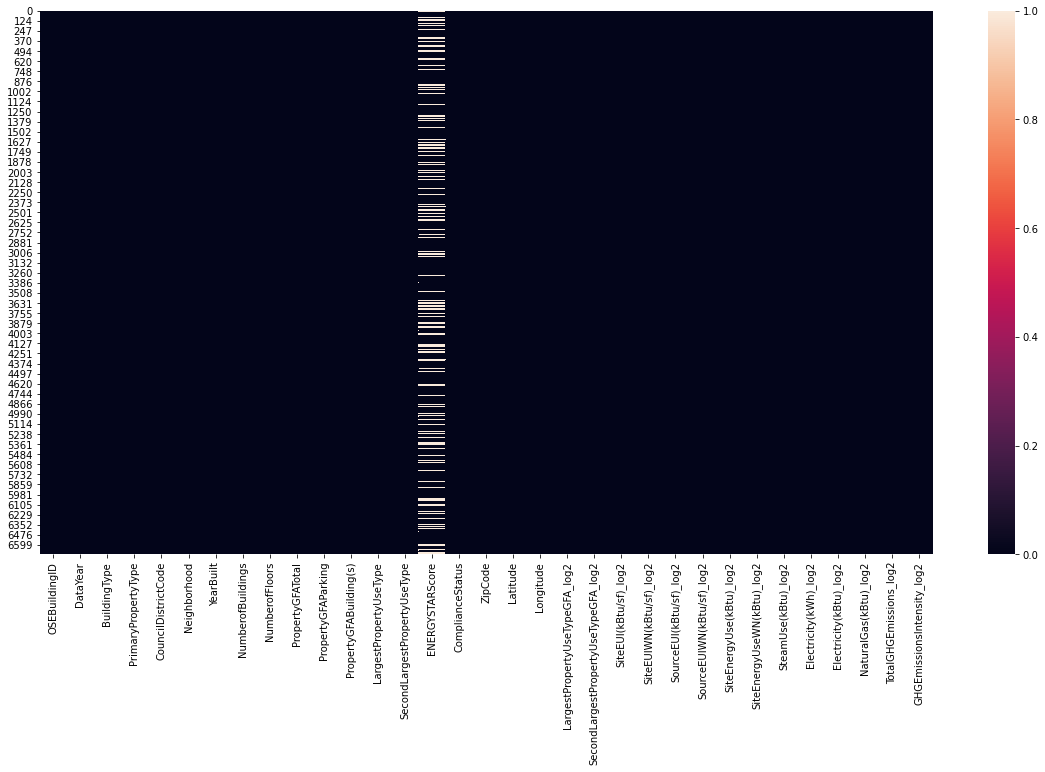

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna())
plt.show()

Traitement des colonnes NumberOfFloors et NumberOfBuildings

In [172]:
data['NumberofBuildings'].fillna(1, inplace=True)

On remplace les NaN de la colonne LargestPropertyUseType par la valeur de la colonne PrimaryUseType

In [168]:
def fillLargestPrimaryUseTypeAndGFA():
    data['LargestPropertyUseType'] = data['LargestPropertyUseType'].astype('string')
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('string')
    for index in data[data['LargestPropertyUseType'].isna()].index.tolist():        
        data.at[index, 'LargestPropertyUseType'] = ''.join(map(str,data[data.index == index]['PrimaryPropertyType'].values))
    data['LargestPropertyUseTypeGFA'].fillna(data['LargestPropertyUseTypeGFA'].dropna().mean(), inplace=True)  
    data['LargestPropertyUseType'] = data['LargestPropertyUseType'].astype('category')
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('category')
fillLargestPrimaryUseTypeAndGFA()

In [169]:
i=0
for col in data.columns:    
    if data[col].isna().sum() > 0:
        i +=1
        print(f'{i}.{col:-<50}{data[col].isna().sum()}')

1.NumberofBuildings---------------------------------8
2.NumberofFloors------------------------------------8
3.ENERGYSTARScore-----------------------------------1623
4.SiteEUI(kBtu/sf)----------------------------------17
5.SiteEUIWN(kBtu/sf)--------------------------------16
6.SourceEUI(kBtu/sf)--------------------------------19
7.SourceEUIWN(kBtu/sf)------------------------------19
8.SiteEnergyUse(kBtu)-------------------------------15
9.SiteEnergyUseWN(kBtu)-----------------------------16
10.SteamUse(kBtu)------------------------------------19
11.Electricity(kWh)----------------------------------19
12.Electricity(kBtu)---------------------------------19
13.NaturalGas(therms)--------------------------------19
14.NaturalGas(kBtu)----------------------------------19
15.TotalGHGEmissions---------------------------------19
16.GHGEmissionsIntensity-----------------------------19


In [193]:
imputeByKNN(data, ['PrimaryPropertyType', 'NumberofBuildings', 'Electricity(kBtu)','NumberofFloors'], 'NumberofFloors')
from sklearn.preprocessing import LabelEncoder
data_copy = data
label = LabelEncoder()
propertycat = data_copy['PrimaryPropertyType'].values.tolist()
data_copy['PrimaryPropertyType'] = label.fit_transform(propertycat)
data_copy[['PrimaryPropertyType', 'NumberofBuildings', 'Electricity(kBtu)','NumberofFloors']]

,index,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ZipCode,Latitude,Longitude
0,0,1,2015,NonResidential,5,7,DOWNTOWN,1927,1.0,12.0,...,3.686160e+06,12724.000000,1.272388e+06,Compliant,Non Outlier,249.43,2.64,98101,47.612190,-122.337997
1,1,2,2015,NonResidential,5,7,DOWNTOWN,1996,1.0,11.0,...,3.905411e+06,44490.000000,4.448985e+06,Compliant,Non Outlier,263.51,2.38,98101,47.613106,-122.333358
2,2,3,2015,NonResidential,5,7,DOWNTOWN,1969,1.0,41.0,...,4.976244e+07,37099.000000,3.709900e+06,Compliant,Non Outlier,2061.48,1.92,98101,47.613349,-122.337699
3,3,5,2015,NonResidential,5,7,DOWNTOWN,1926,1.0,10.0,...,2.769023e+06,20019.000000,2.001894e+06,Compliant,High Outlier,1936.34,31.38,98101,47.614216,-122.336609
4,4,8,2015,NonResidential,5,7,DOWNTOWN,1980,1.0,18.0,...,6.066245e+06,87631.000000,8.763105e+06,Compliant,Non Outlier,507.70,4.02,98121,47.613754,-122.340924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,3371,50222,2016,Nonresidential COS,14,2,GREATER DUWAMISH,1990,1.0,1.0,...,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,Non Outlier,20.94,1.70,98109,47.567220,-122.311540
6712,3372,50223,2016,Nonresidential COS,15,2,DOWNTOWN,2004,1.0,1.0,...,3.965461e+05,5537.299805,5.537300e+05,Compliant,Non Outlier,32.17,2.01,98070,47.596250,-122.322830
6713,3373,50224,2016,Nonresidential COS,15,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,...,1.792159e+06,39737.390630,3.973739e+06,Compliant,Non Outlier,223.54,16.99,98105,47.636440,-122.357840
6714,3374,50225,2016,Nonresidential COS,12,1,GREATER DUWAMISH,1989,1.0,1.0,...,3.488702e+05,3706.010010,3.706010e+05,Compliant,Non Outlier,22.11,1.57,98105,47.528320,-122.324310


In [196]:
data['NumberofFloors'] = imputeByKNN(data_copy, ['PrimaryPropertyType', 'NumberofBuildings', 'Electricity(kBtu)','NumberofFloors'], 'NumberofFloors')


In [197]:
i=0
for col in data.columns:    
    if data[col].isna().sum() > 0:
        i +=1
        print(f'{i}.{col:-<50}{data[col].isna().sum()}')

1.ENERGYSTARScore-----------------------------------1623
2.SiteEUI(kBtu/sf)----------------------------------17
3.SiteEUIWN(kBtu/sf)--------------------------------16
4.SourceEUI(kBtu/sf)--------------------------------19
5.SourceEUIWN(kBtu/sf)------------------------------19
6.SiteEnergyUse(kBtu)-------------------------------15
7.SiteEnergyUseWN(kBtu)-----------------------------16
8.SteamUse(kBtu)------------------------------------19
9.Electricity(kWh)----------------------------------19
10.Electricity(kBtu)---------------------------------19
11.NaturalGas(therms)--------------------------------19
12.NaturalGas(kBtu)----------------------------------19
13.TotalGHGEmissions---------------------------------19
14.GHGEmissionsIntensity-----------------------------19


In [204]:
data_copy[data_copy['SiteEUI(kBtu/sf)'].isna()][['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On voit que les NaN pour les données energétiques concernent les mêmes enregistrements. Ils ne sont donc pas pertinents 
pour notre analyse. Nous les supprimons.


In [215]:
def delete_NaN_from_energyCol():
    for index in data[data['TotalGHGEmissions'].isna()].index.tolist():
        data.drop(data[data.index == index].index, inplace=True)
    for index in data[data['SiteEUI(kBtu/sf)'].isna()].index.tolist():
        data.drop(data[data.index == index].index, inplace=True)
    for index in data[data['SiteEUIWN(kBtu/sf)'].isna()].index.tolist():
        data.drop(data[data.index == index].index, inplace=True)

In [216]:
delete_NaN_from_energyCol()

In [217]:
i=0
for col in data.columns:    
    if data[col].isna().sum() > 0:
        i +=1
        print(f'{i}.{col:-<50}{data[col].isna().sum()}')

1.ENERGYSTARScore-----------------------------------1602


Il ne reste plus que la colonne EnergyScore contenant des NaN.

### ENERGYSTARScore

In [7]:
data.select_dtypes(['int64','float64']).columns

Index(['index', 'OSEBuildingID', 'DataYear', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ZipCode', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
a = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity']
b= []
for col in a:
    if col in data.select_dtypes(['int64','float64']).columns:
        b.append(col)
        
b

['SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity']

In [13]:
data.drop(columns=['index'],inplace=True)

In [10]:
data.drop(columns=b, inplace=True)

In [14]:
data.select_dtypes(['int64','float64']).columns

Index(['OSEBuildingID', 'DataYear', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'ZipCode', 'Latitude',
       'Longitude'],
      dtype='object')

### Outliers

In [21]:

data.drop(data[~(data['Outlier'] == 'Non Outlier')].index, inplace=True)


data.drop(columns=['Outlier'], inplace=True)
print(data.shape)
    

(6580, 24)
(6580, 24)
(6580, 23)


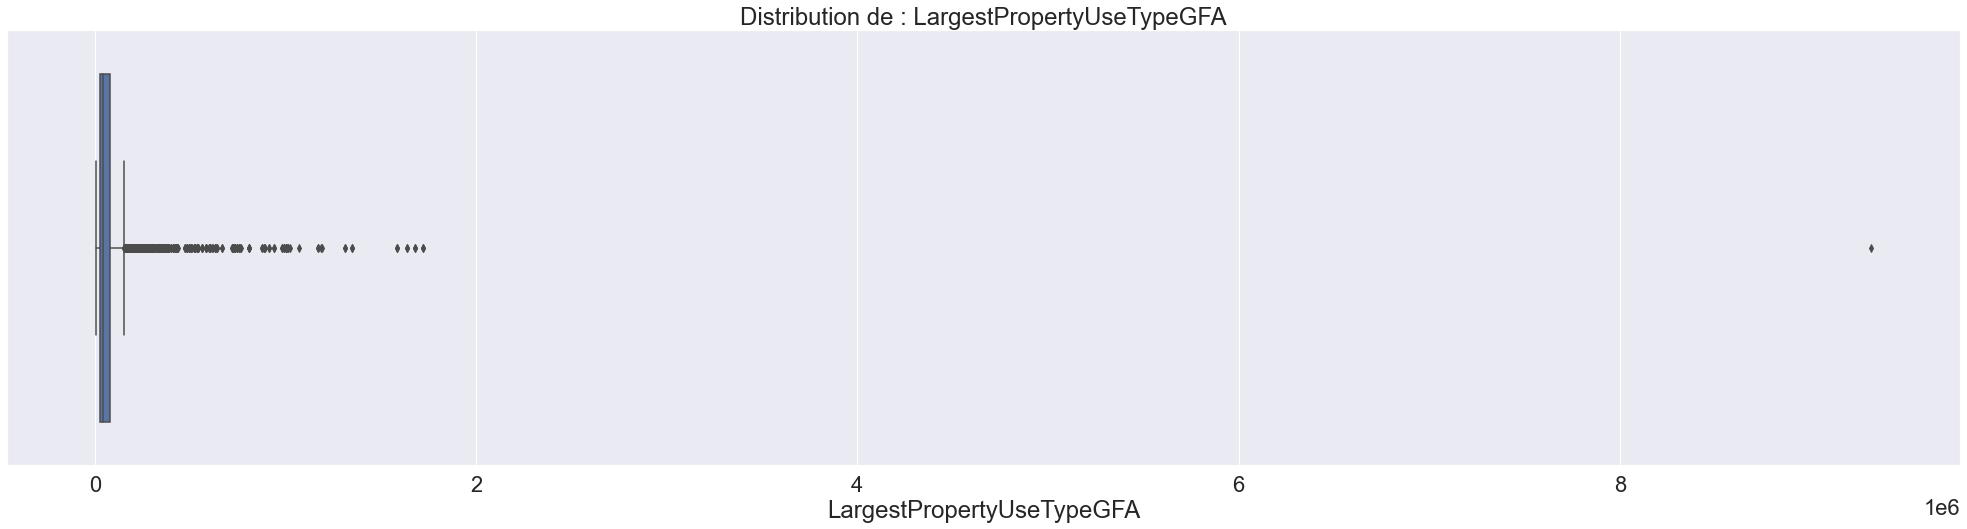

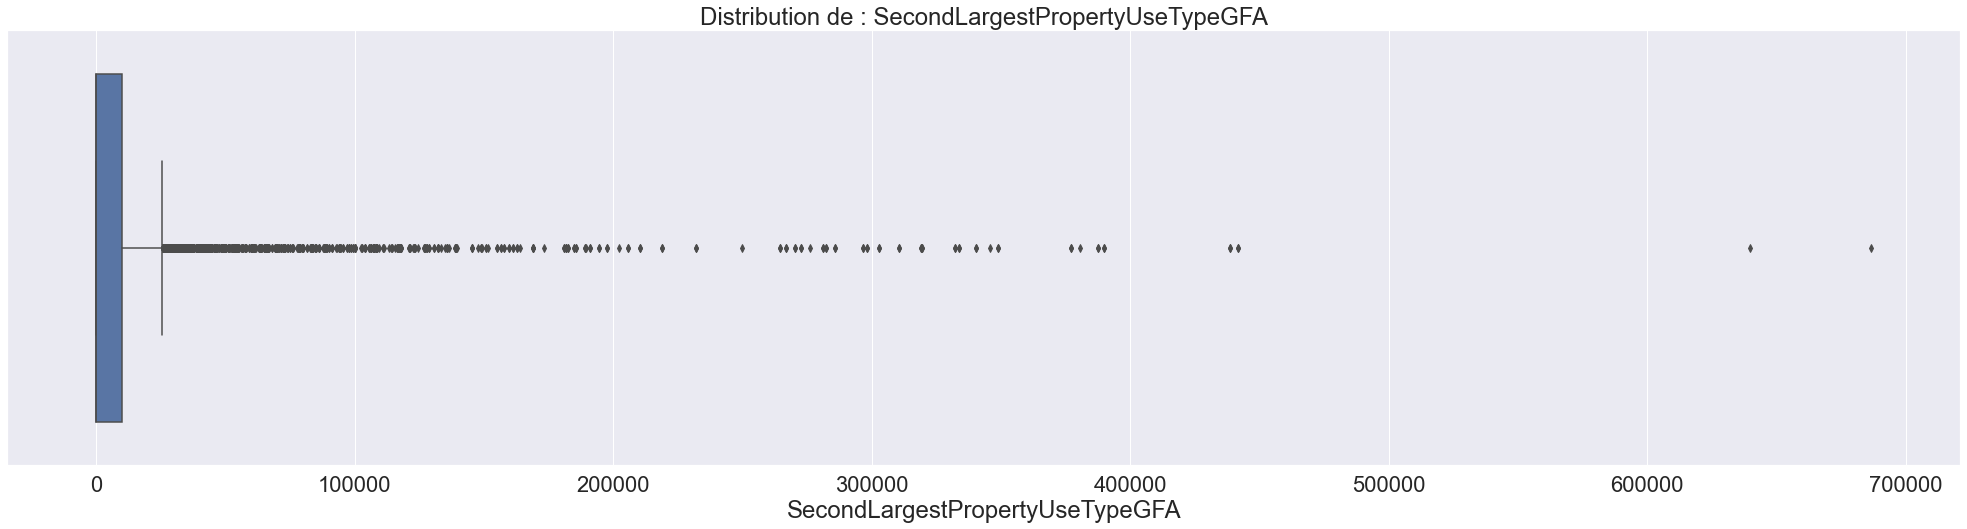

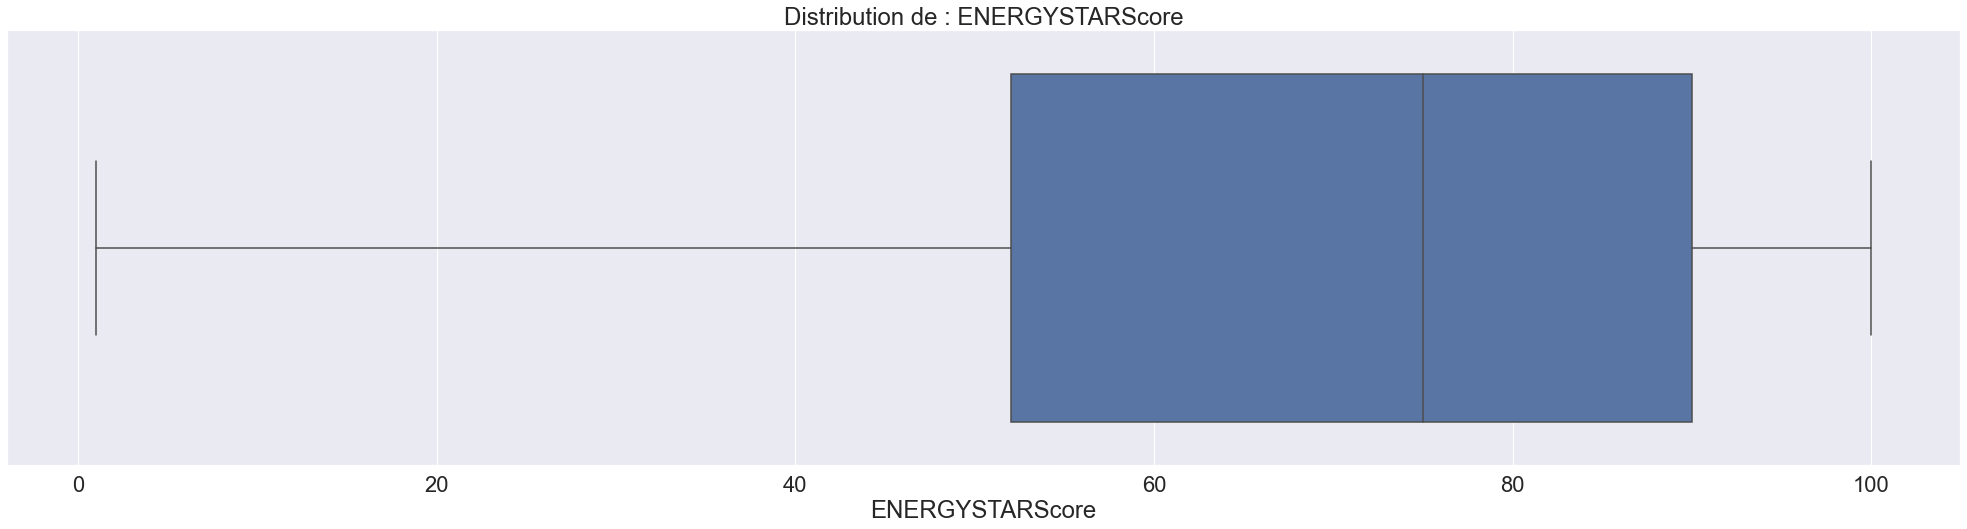

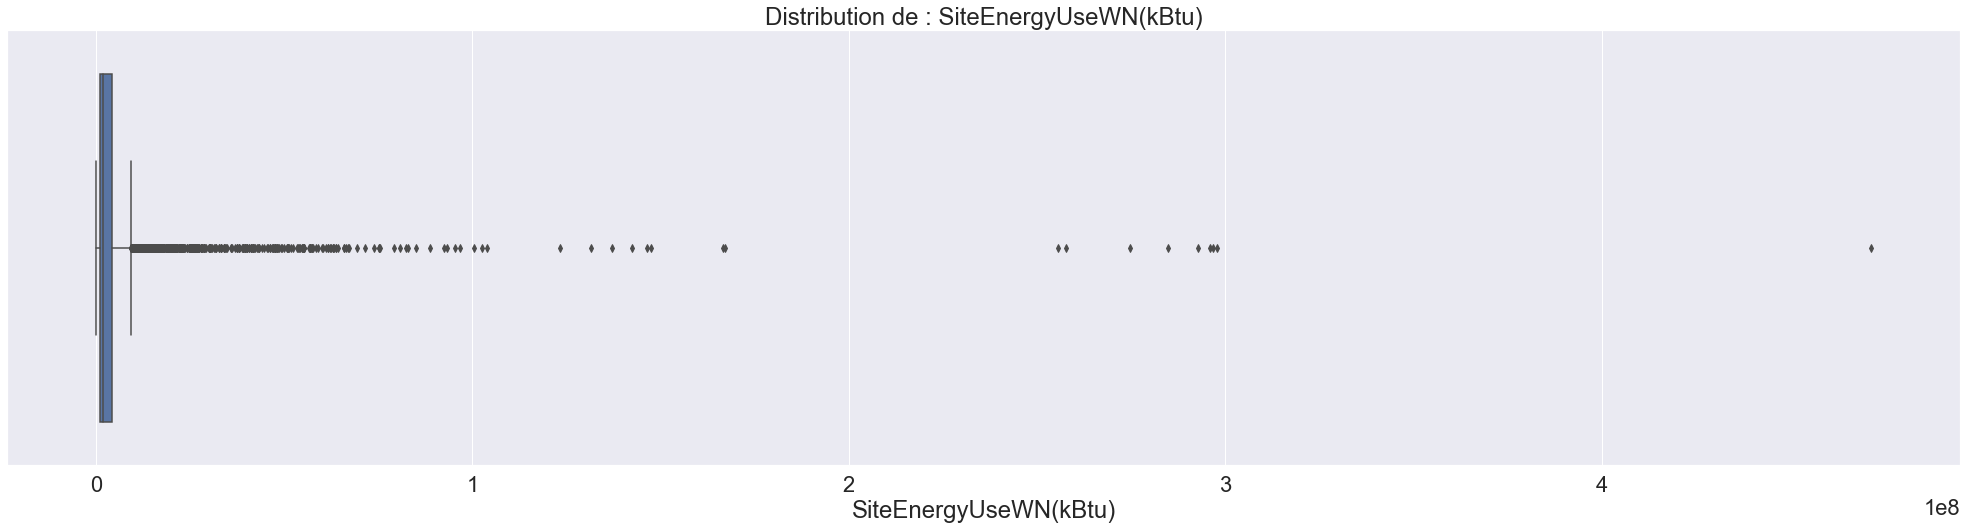

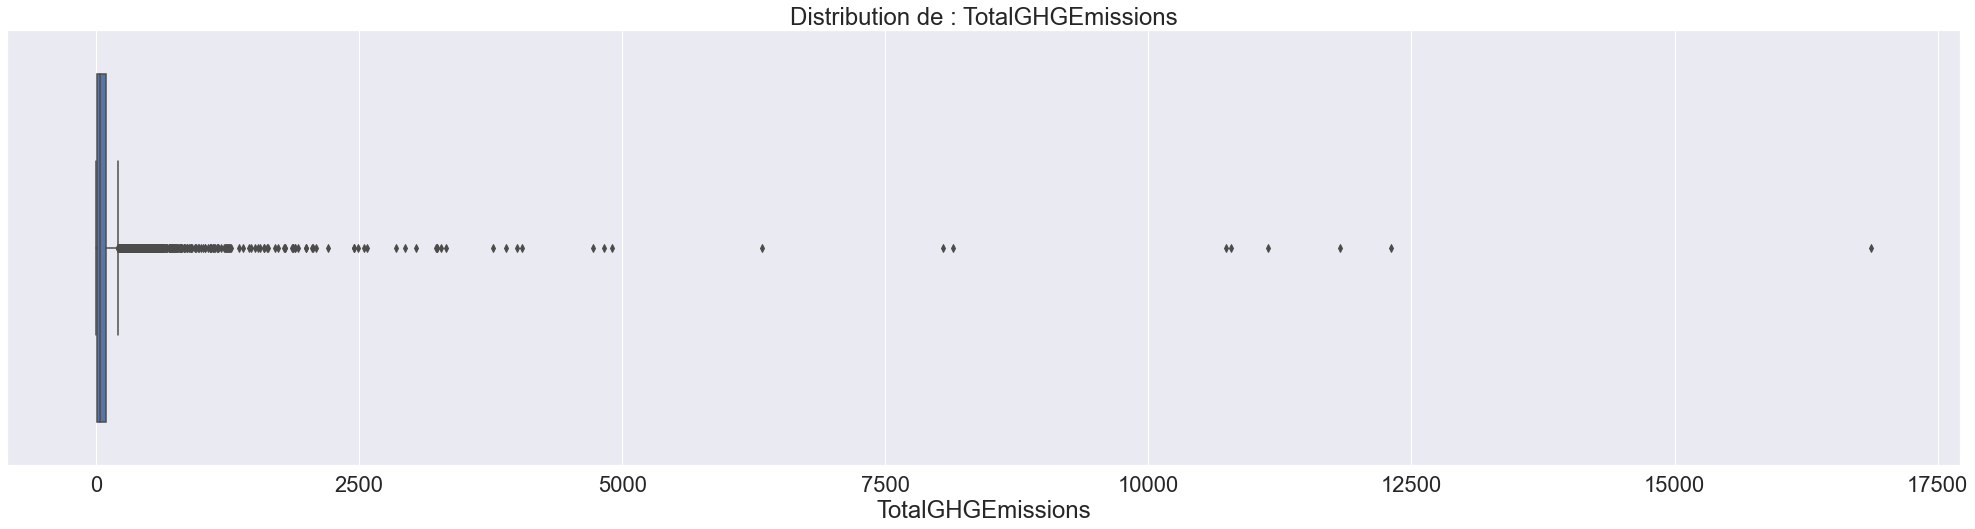

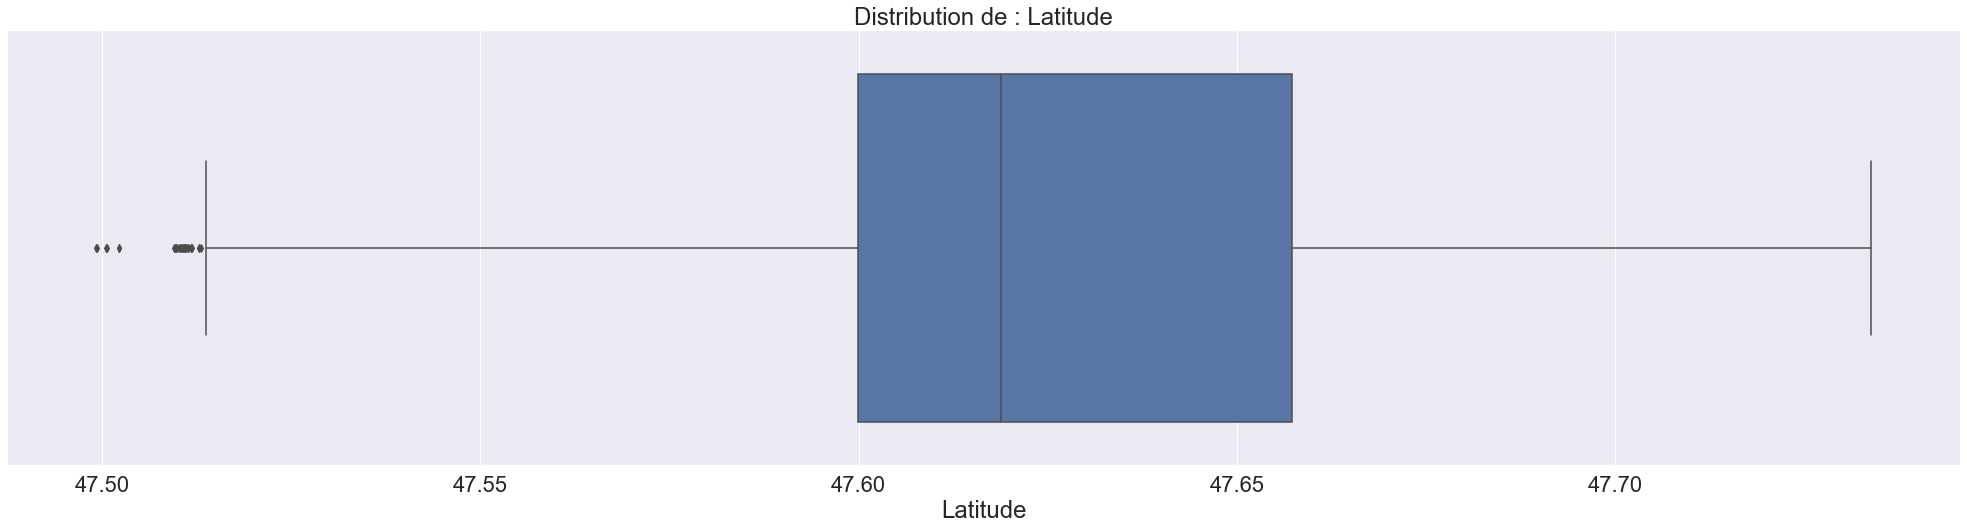

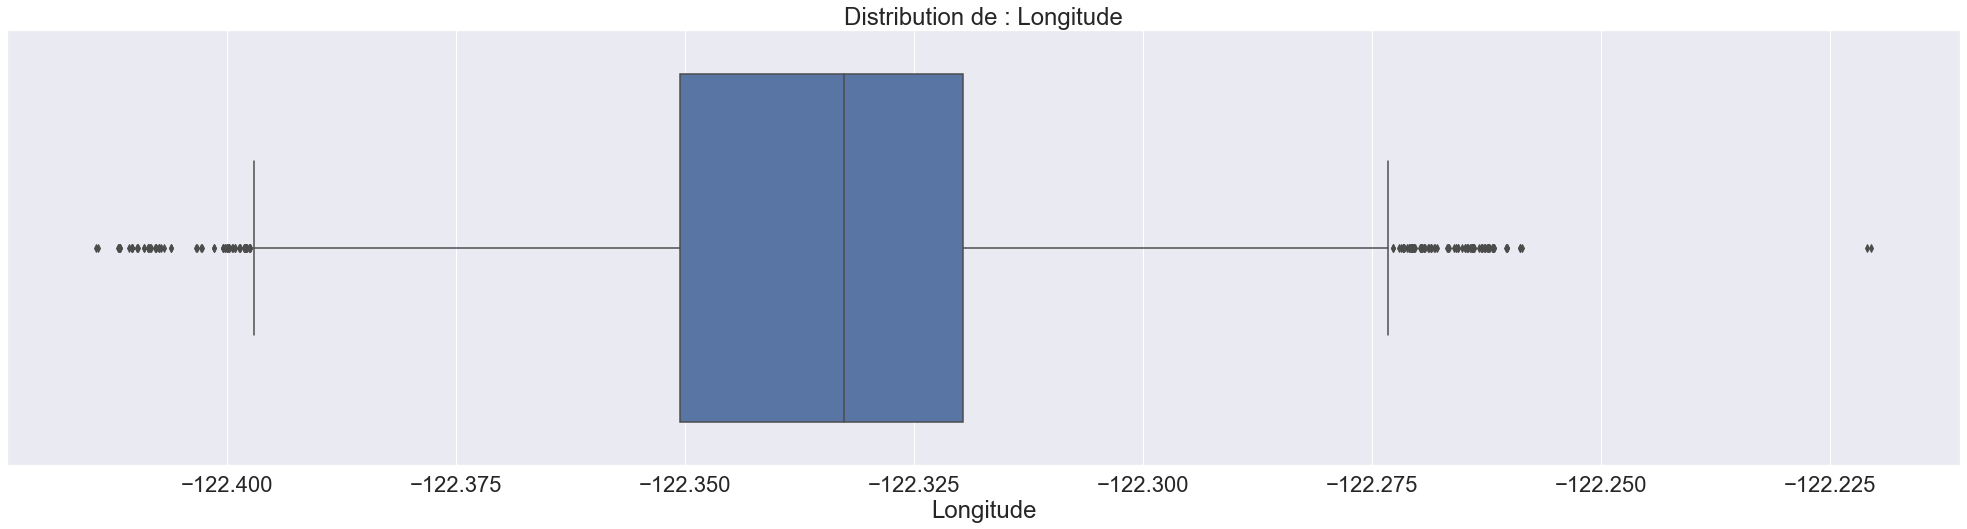

In [22]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (35,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [23]:
data['SecondLargestPropertyUseTypeGFA'].describe()

count      6580.000000
mean      13490.472234
std       39025.634906
min           0.000000
25%           0.000000
50%           0.000000
75%       10240.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [24]:
data[data['SecondLargestPropertyUseTypeGFA']==686750]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),ComplianceStatus,TotalGHGEmissions,ZipCode,Latitude,Longitude
305,435,2015,NonResidential,15,7,DOWNTOWN,1990,1,6,1400000,0,1400000,Convention Center,1072000.0,Parking,686750.0,NaN,79041984.0,Compliant,1793.9,98101,47.611586,-122.331601


Ces données sont ils des outliers? Comparons les valeurs prises par d'autres colonnes avec les moyennes:

In [45]:
col = ''
print(f'Colonne{col:-<33}Moyenne{col:-<43}Valeur pour notre enregistrement')
for col in ['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']:
    moyenne = data[col].mean()
    valeur = data[data['SecondLargestPropertyUseTypeGFA']==686750][col].values
    print(f'{col:-<40}{moyenne:-<50}{valeur}')

Colonne---------------------------------Moyenne-------------------------------------------Valeur pour notre enregistrement
PropertyGFATotal------------------------93156.82294832826---------------------------------[1400000]
LargestPropertyUseTypeGFA---------------77283.63258511576---------------------------------[1072000.]
SecondLargestPropertyUseTypeGFA---------13490.472233568391--------------------------------[686750.]
SiteEnergyUseWN(kBtu)-------------------5229433.489129227---------------------------------[79041984.]
TotalGHGEmissions-----------------------114.49649999999995--------------------------------[1793.9]


On voit bien que les valeurs dépassent largement la moyenne pour les colonnes informant sur la surface ainsi que ceux informant 
sur la consommation. Il s'agit de batiments bien plus grands que la moyenne (Convention center par exemple).
On ne peut pas les traiter comme des valeurs aberrantes. On se contente donc de supprimer les lignes étiquetées comme outlier.

In [56]:
data = data[data['ComplianceStatus'] == 'Compliant']

In [57]:
data.drop(columns=['ComplianceStatus'], inplace=True)

In [79]:
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('category')

In [84]:
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('category')

In [87]:
data['ZipCode'] = data['ZipCode'].astype('category')

In [74]:
data.dtypes

OSEBuildingID                         int64
DataYear                              int64
BuildingType                         object
PrimaryPropertyType                   int64
CouncilDistrictCode                   int64
Neighborhood                         object
YearBuilt                             int64
NumberofBuildings                     int64
NumberofFloors                        int64
PropertyGFATotal                      int64
PropertyGFAParking                    int64
PropertyGFABuilding(s)                int64
LargestPropertyUseType             category
LargestPropertyUseTypeGFA           float64
SecondLargestPropertyUseType         object
SecondLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                     float64
SiteEnergyUseWN(kBtu)               float64
TotalGHGEmissions                   float64
ZipCode                               int64
Latitude                            float64
Longitude                           float64
dtype: object

In [115]:
numeric_columns = data.select_dtypes(['int64', 'float64']).columns.tolist()
numeric_columns.remove('OSEBuildingID')
numeric_columns.remove('DataYear')
numeric_columns

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'Latitude',
 'Longitude']

## Analyse univariée

### Variables numériques

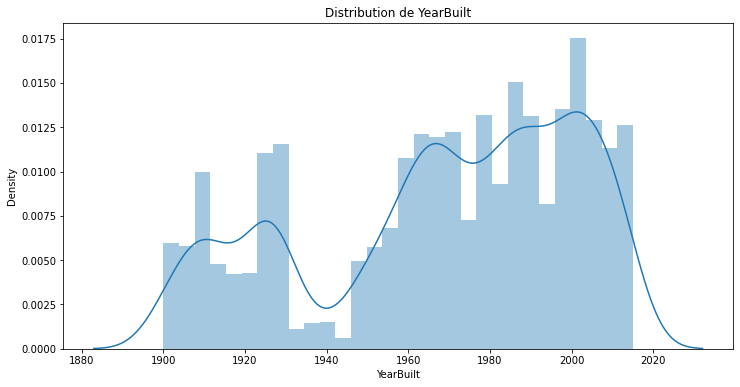

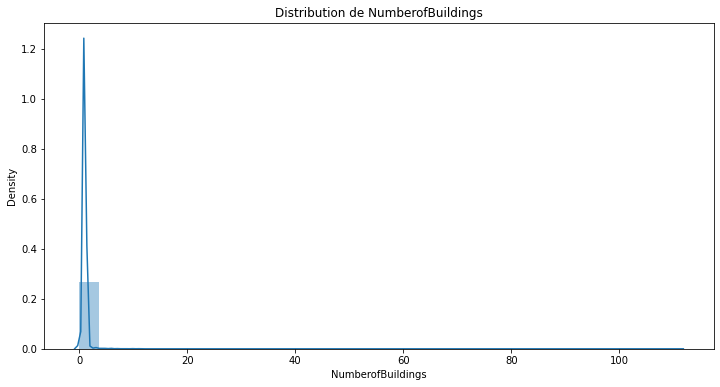

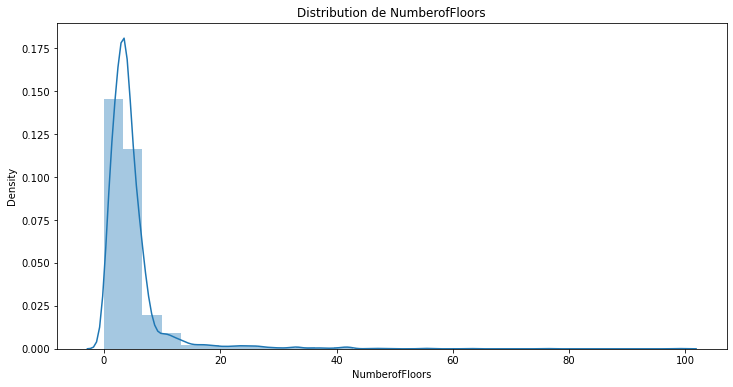

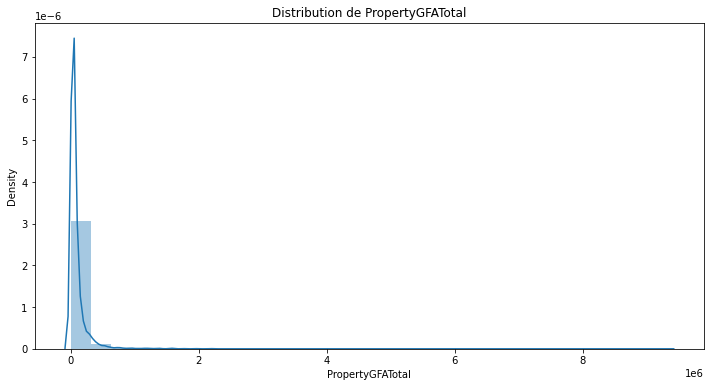

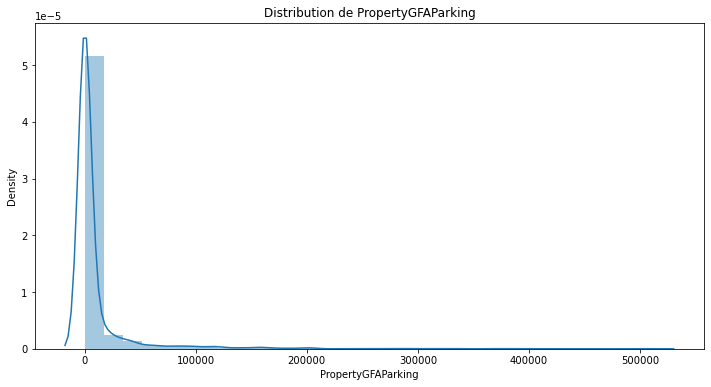

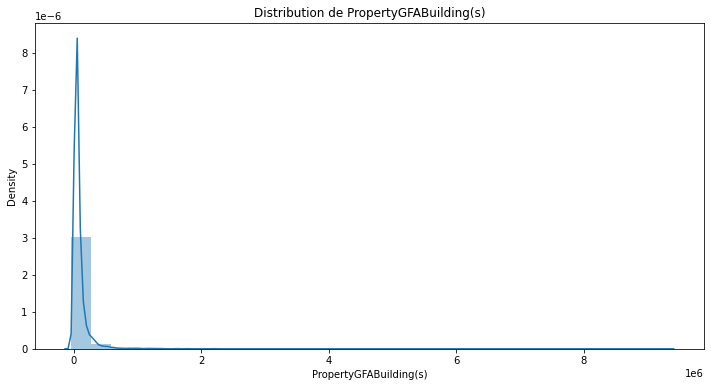

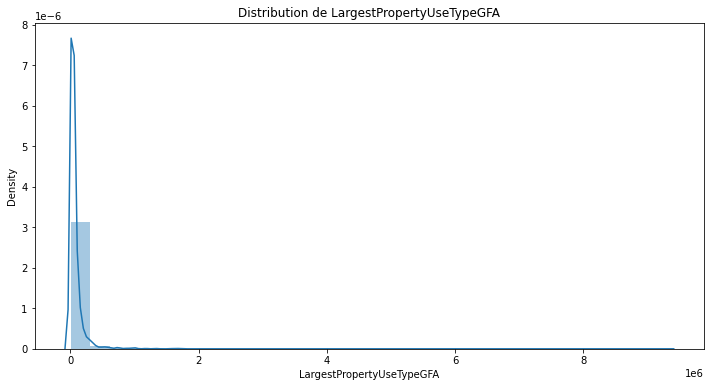

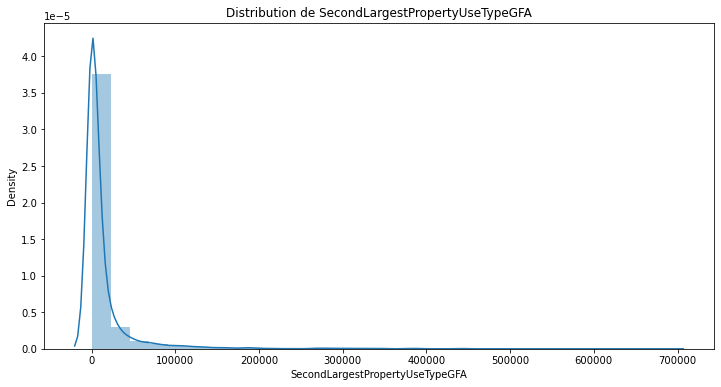

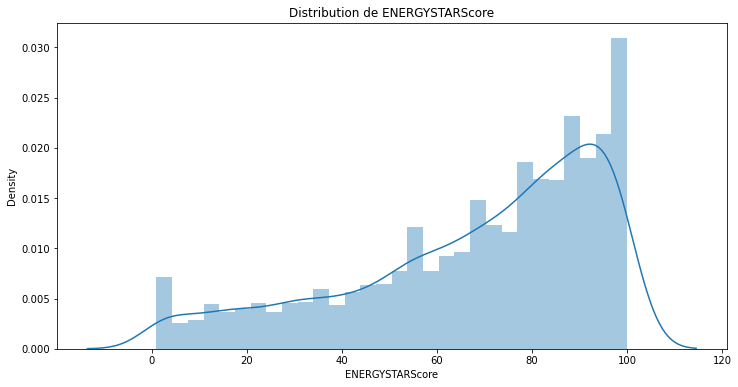

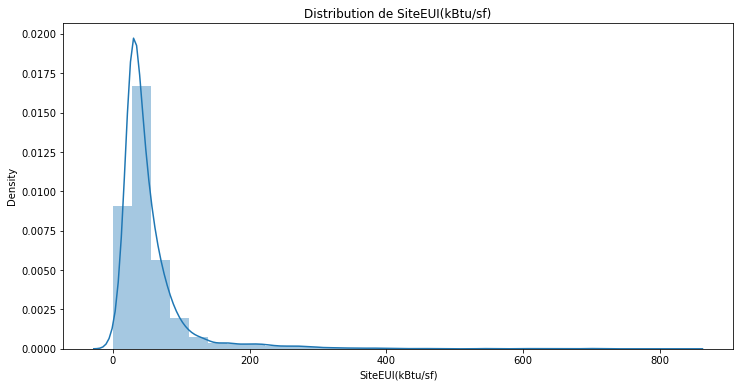

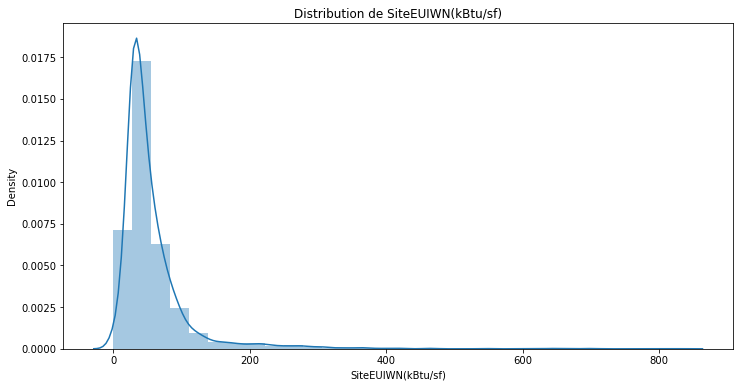

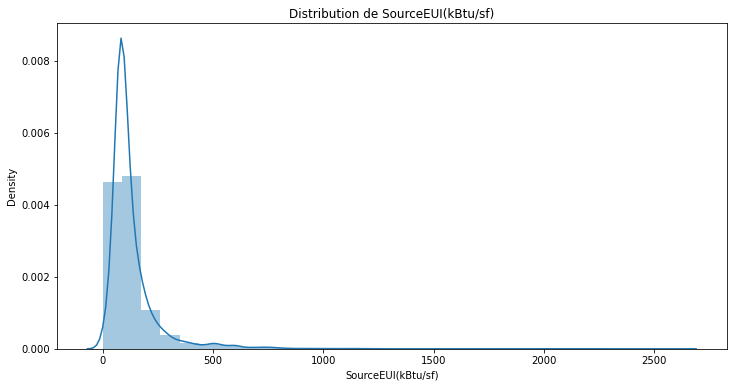

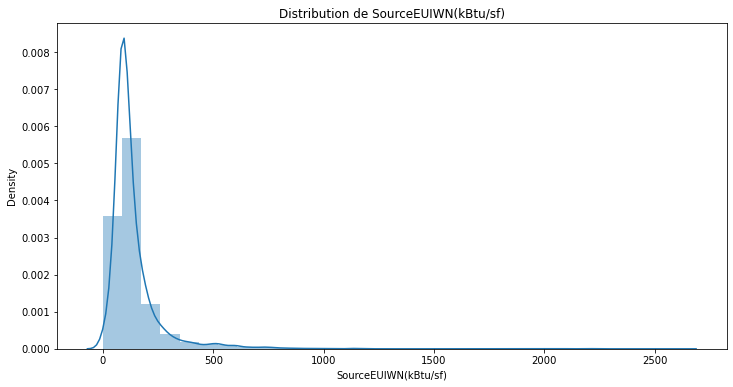

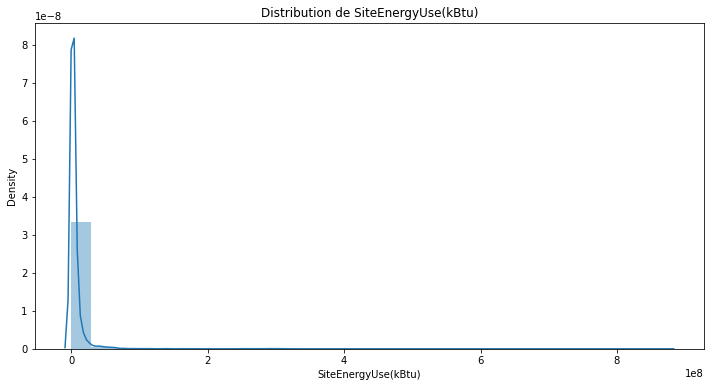

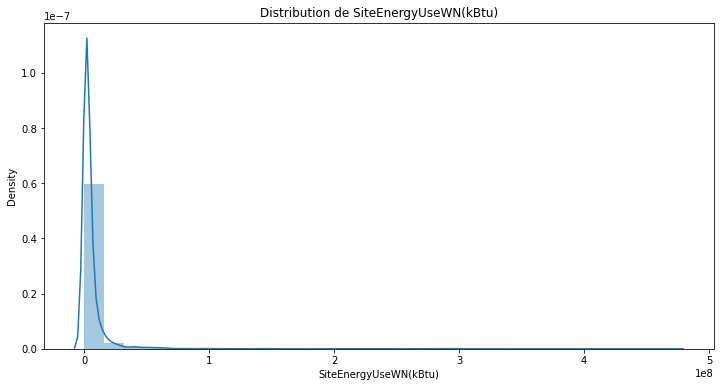

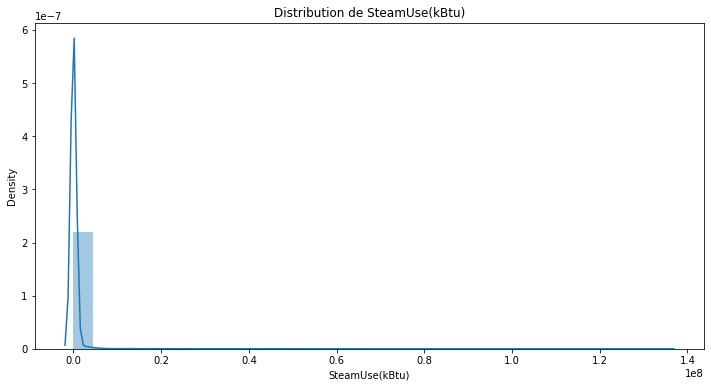

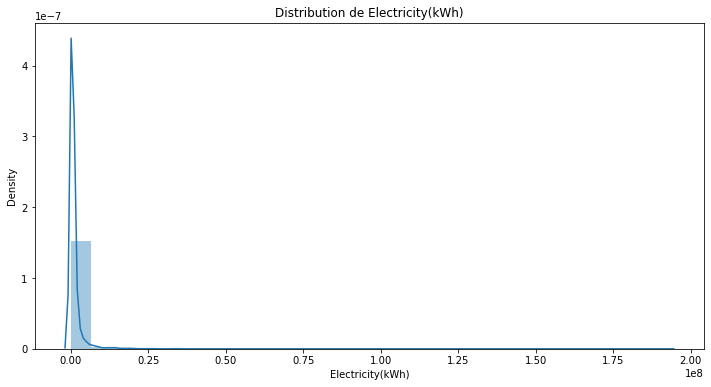

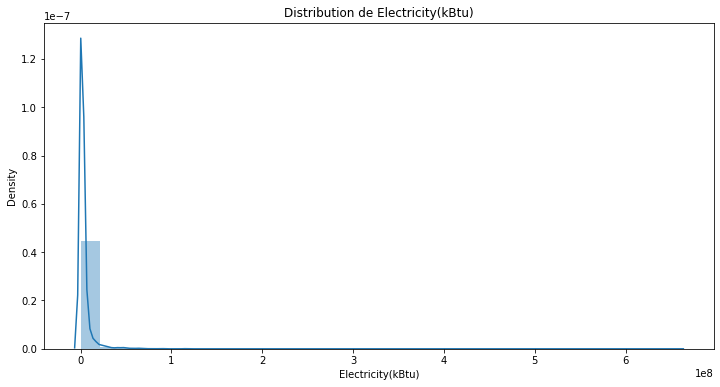

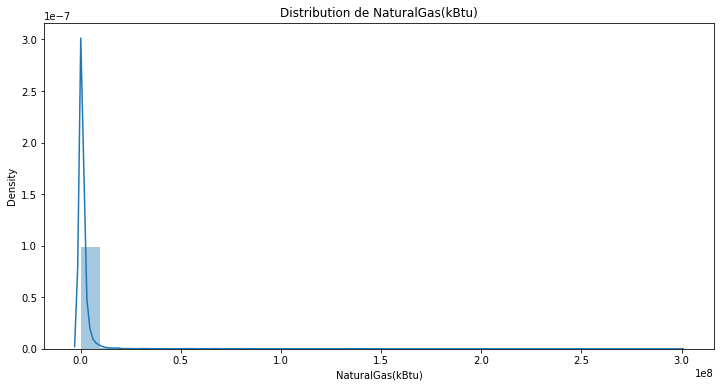

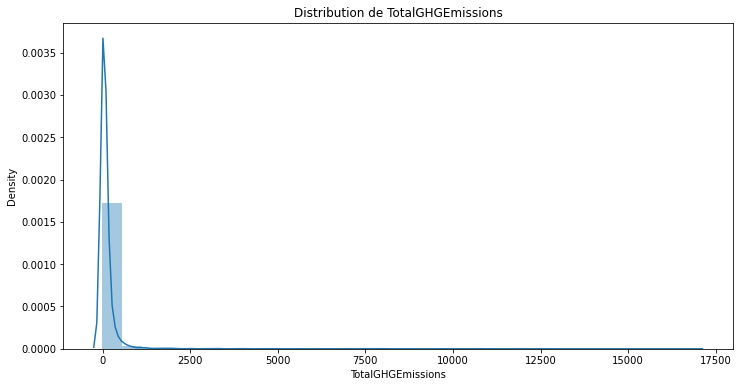

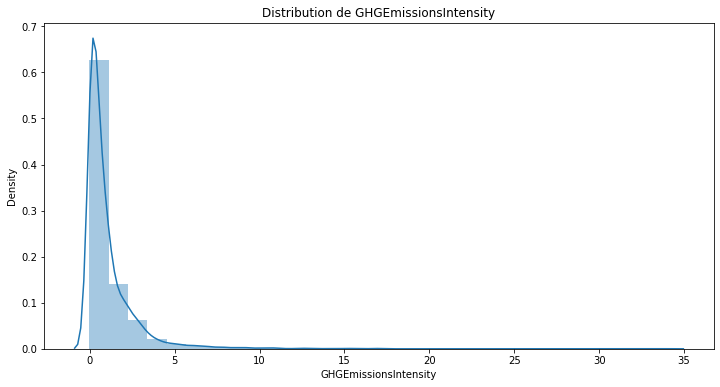

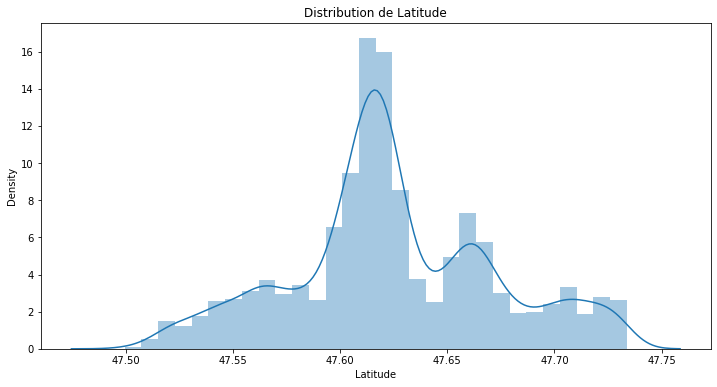

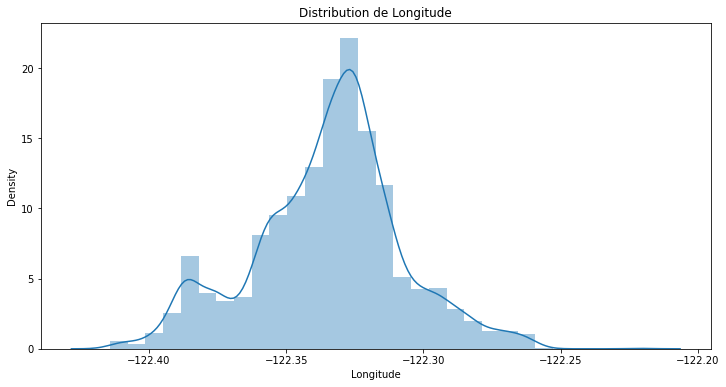

In [61]:
numeric_columns = data.select_dtypes(['int64', 'float64']).columns.tolist()
numeric_columns.remove('OSEBuildingID')
numeric_columns.remove('DataYear')
for column in numeric_columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.distplot(data[column].dropna(), bins=30)

La latitude et la longitude ont des distributions plutôt symétriques centrés sur la moyenne. Les batiments sont plus concentrés
à downtown Seattle.
La colonne ENERGYSTARScore est skewed à gauche, ce qui signifie que les batiments les plus nombreux sont ceux avec un gros score.
Les autres colonnes (surface et consommation) sont fortement skewed à droite. Cela s'explique par les batiments hors normes ayant des valeurs dépassant largement l'interquartile.
Pour reduire la variance, passons les variables target au log:

In [19]:
highSkewed_columns = []
 
for column in numeric_columns:
    skewness = data[column].skew()
    if skewness > 1:
        highSkewed_columns.append(column)
highSkewed_columns        

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [62]:
for col in highSkewed_columns:
    print(f'{col::<50}{data[data[col] < 0].shape[0]}')

NumberofBuildings:::::::::::::::::::::::::::::::::0
NumberofFloors::::::::::::::::::::::::::::::::::::0
PropertyGFATotal::::::::::::::::::::::::::::::::::0
PropertyGFAParking::::::::::::::::::::::::::::::::2
PropertyGFABuilding(s)::::::::::::::::::::::::::::2
LargestPropertyUseTypeGFA:::::::::::::::::::::::::0
SecondLargestPropertyUseTypeGFA:::::::::::::::::::0
SiteEUI(kBtu/sf)::::::::::::::::::::::::::::::::::0
SiteEUIWN(kBtu/sf)::::::::::::::::::::::::::::::::0
SourceEUI(kBtu/sf)::::::::::::::::::::::::::::::::0
SourceEUIWN(kBtu/sf)::::::::::::::::::::::::::::::1
SiteEnergyUse(kBtu):::::::::::::::::::::::::::::::0
SiteEnergyUseWN(kBtu):::::::::::::::::::::::::::::0
SteamUse(kBtu)::::::::::::::::::::::::::::::::::::0
Electricity(kWh)::::::::::::::::::::::::::::::::::1
Electricity(kBtu):::::::::::::::::::::::::::::::::1
NaturalGas(kBtu)::::::::::::::::::::::::::::::::::0
TotalGHGEmissions:::::::::::::::::::::::::::::::::1
GHGEmissionsIntensity:::::::::::::::::::::::::::::1


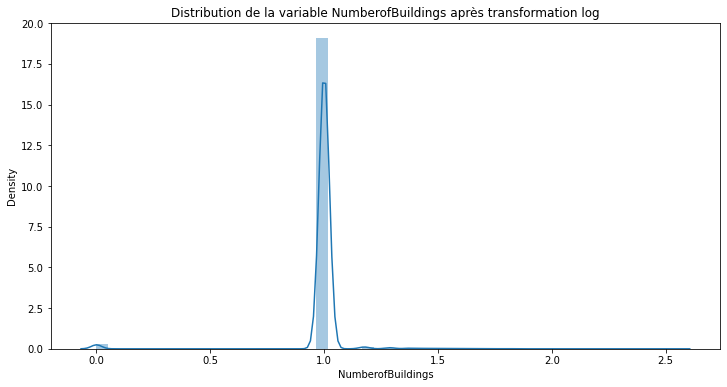

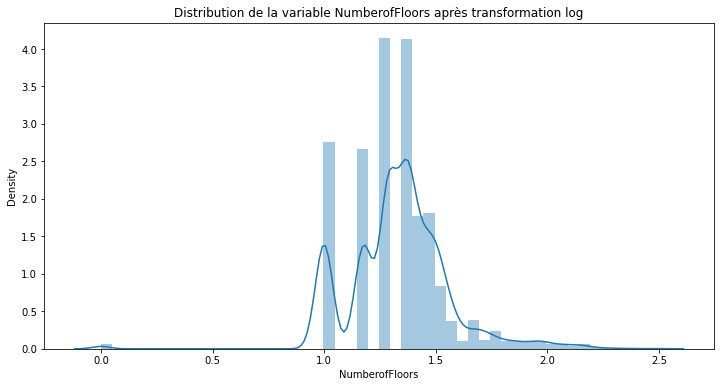

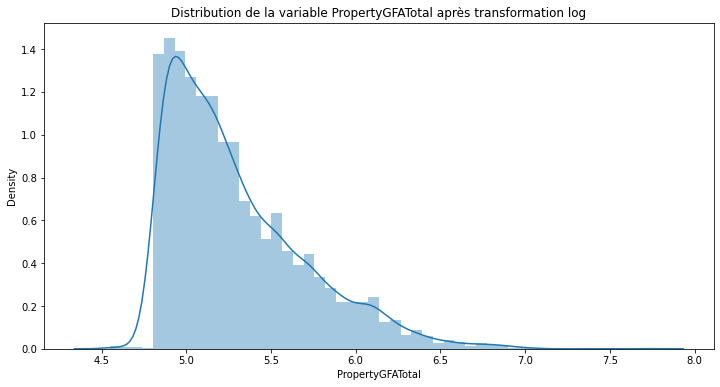

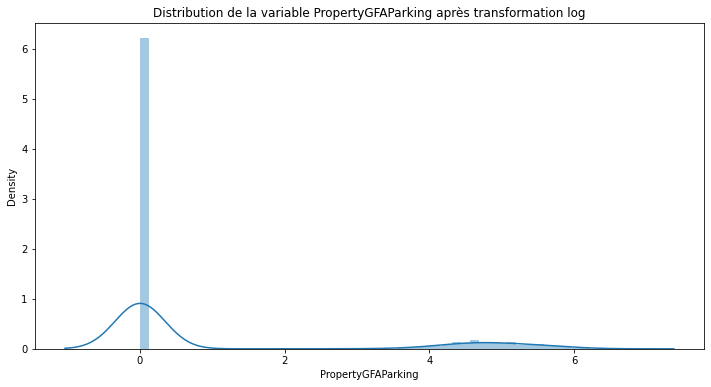

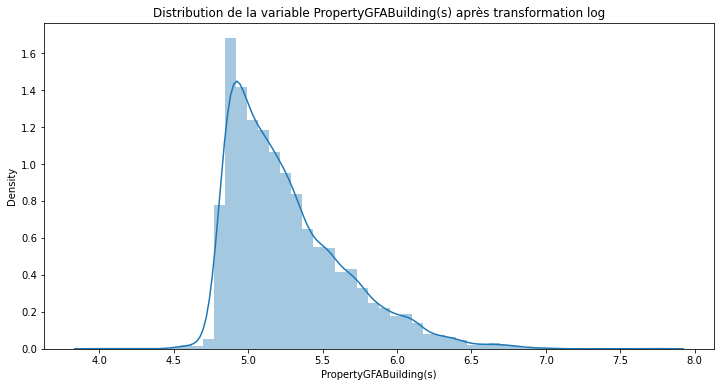

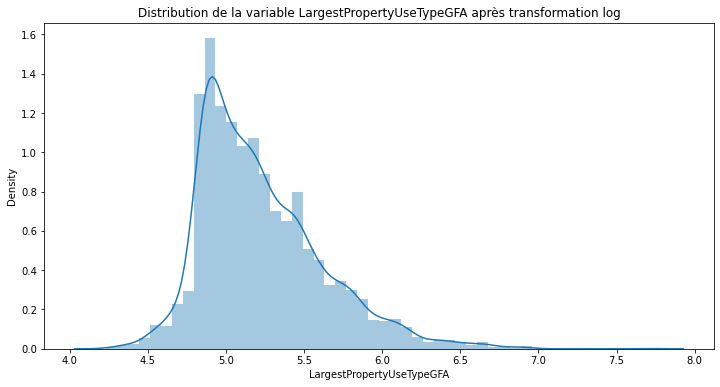

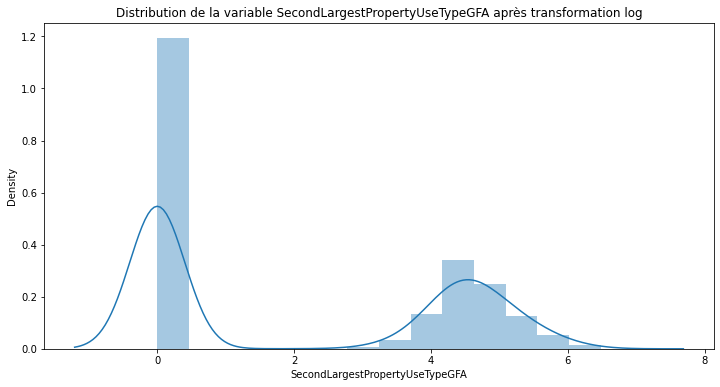

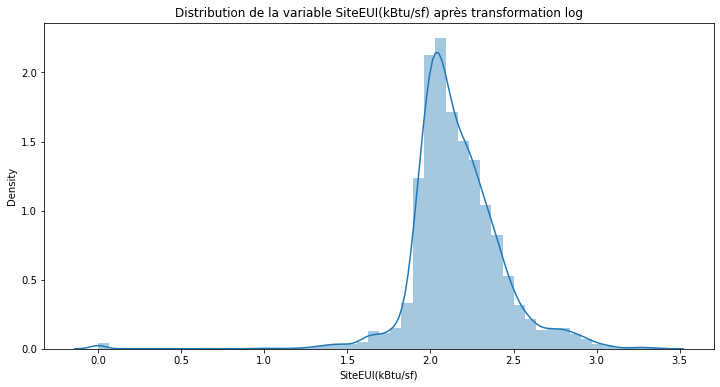

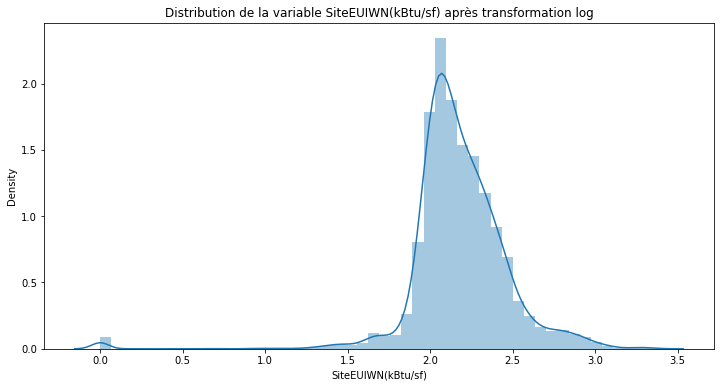

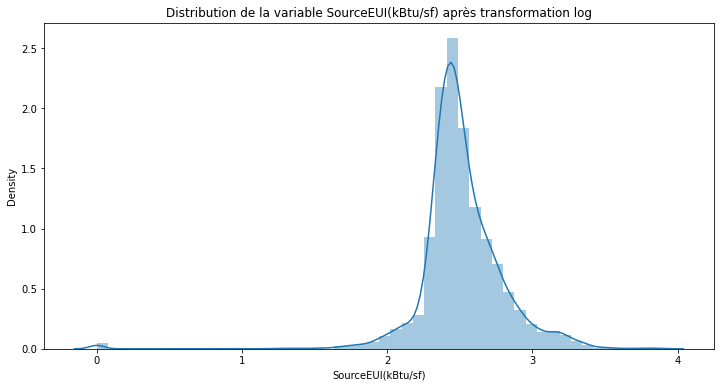

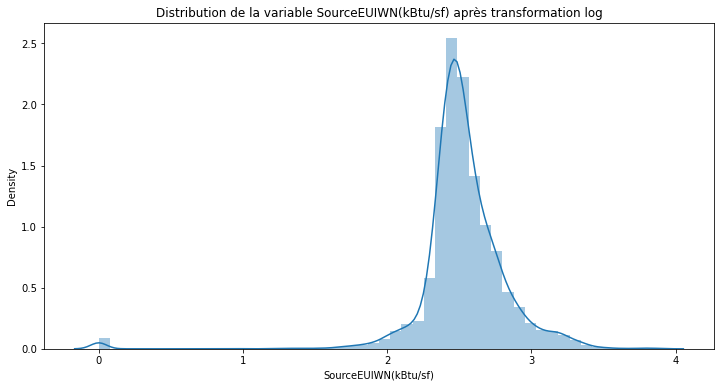

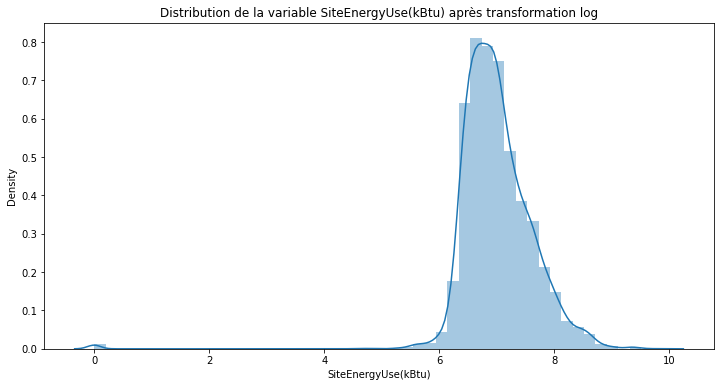

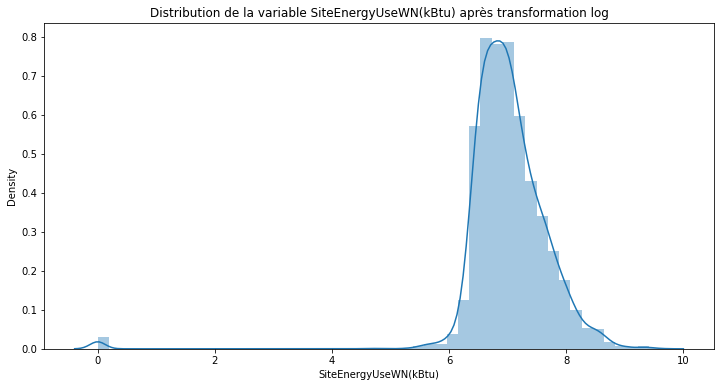

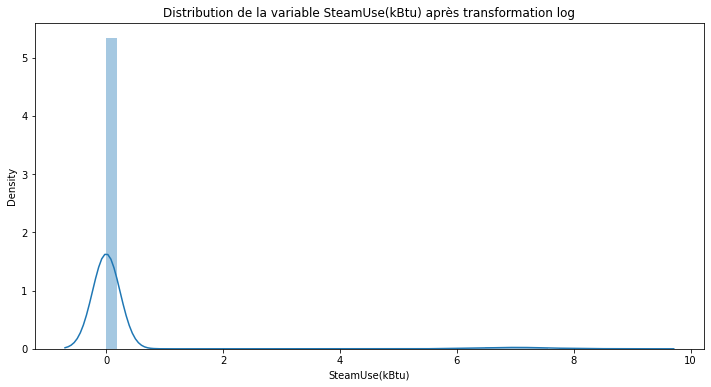

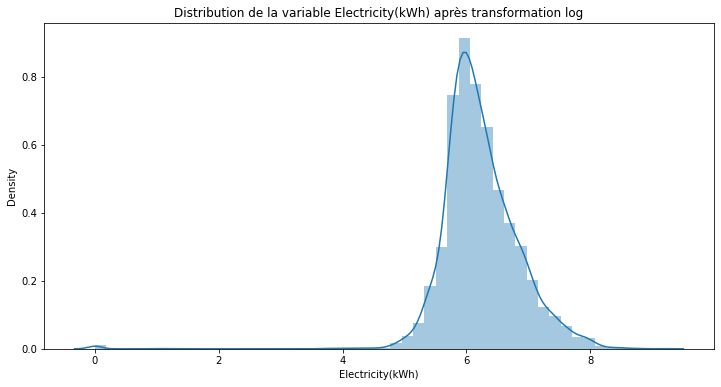

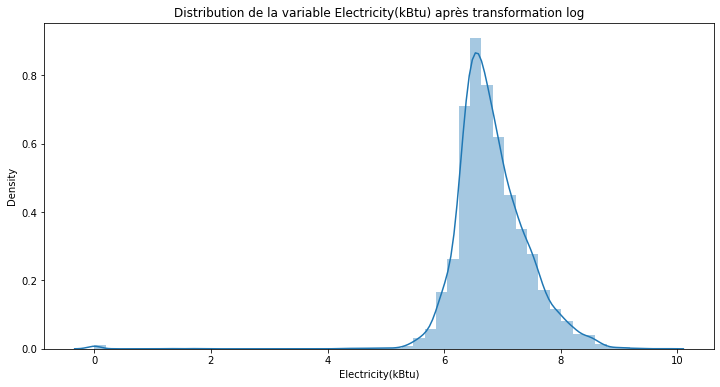

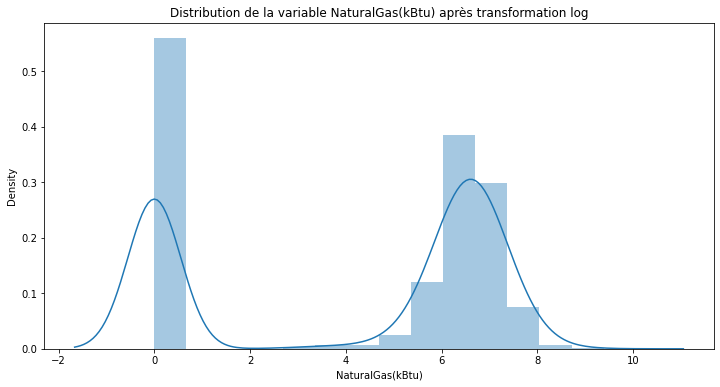

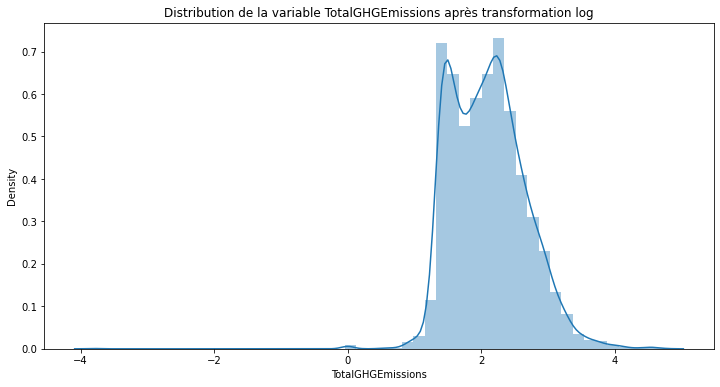

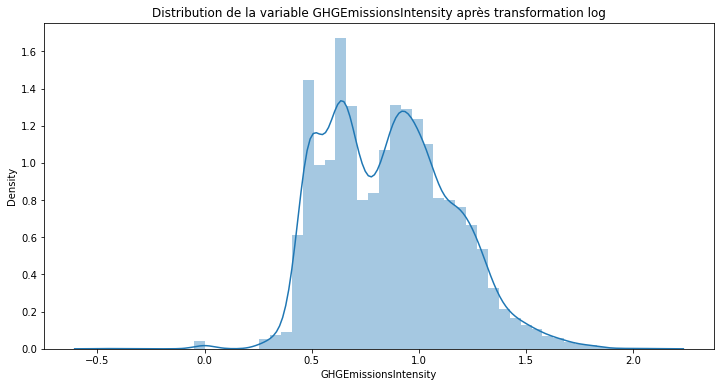

In [38]:
for col in highSkewed_columns:
    plt.figure(figsize=(12,6))
    title = 'Distribution de la variable ' +  col + ' après transformation log'
    plt.title(title )
    sns.distplot(np.log2(1 + np.cbrt(data[col])))

In [42]:

data.head(2)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,ComplianceStatus,ZipCode,Latitude,Longitude,NumberofBuildings_log2,NumberofFloors_log2,PropertyGFATotal_log2,PropertyGFAParking_log2,PropertyGFABuilding(s)_log2,LargestPropertyUseTypeGFA_log2,SecondLargestPropertyUseTypeGFA_log2,SiteEUI(kBtu/sf)_log2,SiteEUIWN(kBtu/sf)_log2,SourceEUI(kBtu/sf)_log2,SourceEUIWN(kBtu/sf)_log2,SiteEnergyUse(kBtu)_log2,SiteEnergyUseWN(kBtu)_log2,SteamUse(kBtu)_log2,Electricity(kWh)_log2,Electricity(kBtu)_log2,NaturalGas(kBtu)_log2,TotalGHGEmissions_log2,GHGEmissionsIntensity_log2
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,Hotel,No information,65.0,Compliant,98101,47.612190,-122.337997,1.0,3.700440,16.432330,0.000000,16.432330,16.432330,0.000000,6.320124,6.345183,7.447083,7.460251,22.735091,22.758888,20.948088,20.043011,21.813688,20.279108,7.968264,1.863938
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,Hotel,Parking,51.0,Compliant,98101,47.613106,-122.333358,1.0,3.584963,16.660205,13.878913,16.433439,16.356056,13.878913,6.575917,6.643856,7.587215,7.616181,22.994076,23.063453,0.000000,20.126367,21.897043,22.085045,8.047178,1.757023


Ajoutons 1 pour éviter le log(0):

<AxesSubplot:title={'center':'Distribution de la variable TotalGHGEmissions après transformation log'}, xlabel='TotalGHGEmissions', ylabel='Density'>

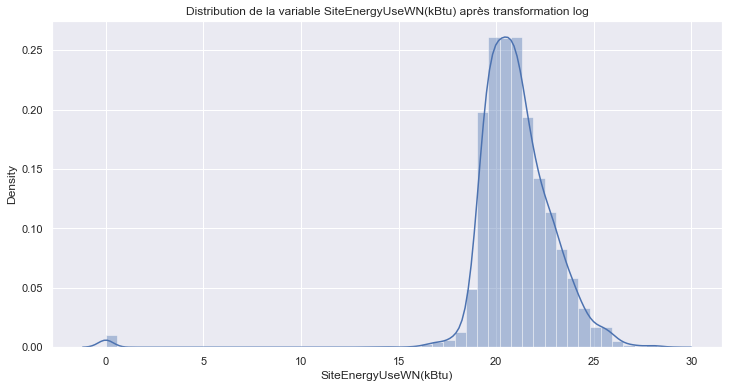

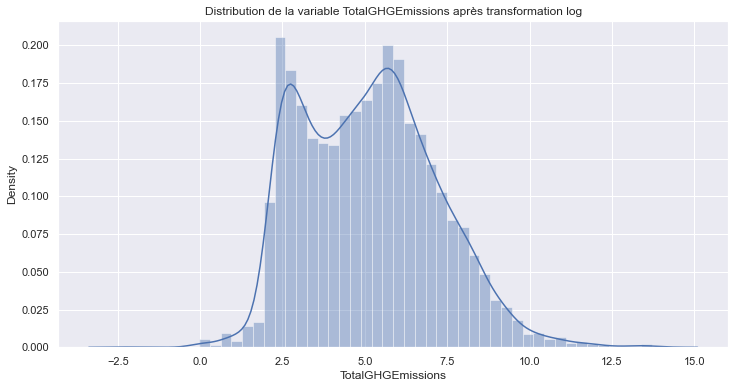

In [134]:
plt.figure(figsize=(12,6))
plt.title('Distribution de la variable SiteEnergyUseWN(kBtu) après transformation log')
sns.distplot(np.log2(1+data['SiteEnergyUseWN(kBtu)']))
plt.figure(figsize=(12,6))
plt.title('Distribution de la variable TotalGHGEmissions après transformation log')
sns.distplot(np.log2(1+data['TotalGHGEmissions']))

In [131]:
data['SiteEnergyUseWN(kBtu)_log2'] = np.log2(1+data['SiteEnergyUseWN(kBtu)'])
data['TotalGHGEmissions_log2'] = np.log2(1+data['TotalGHGEmissions'])

### Variables catégorielles

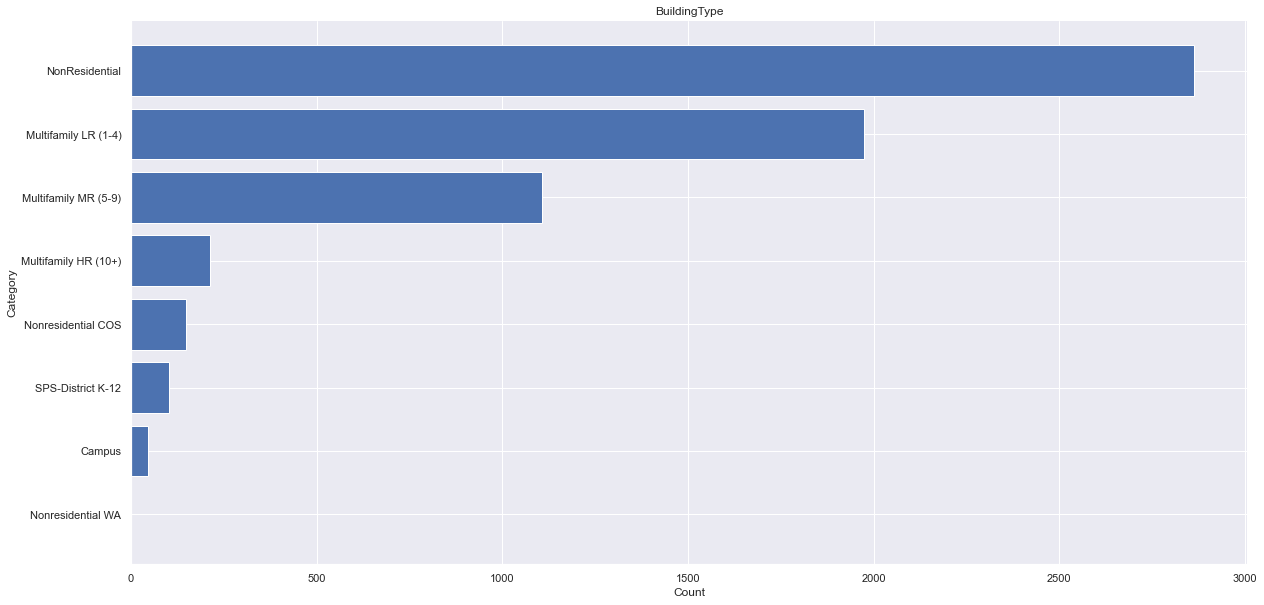

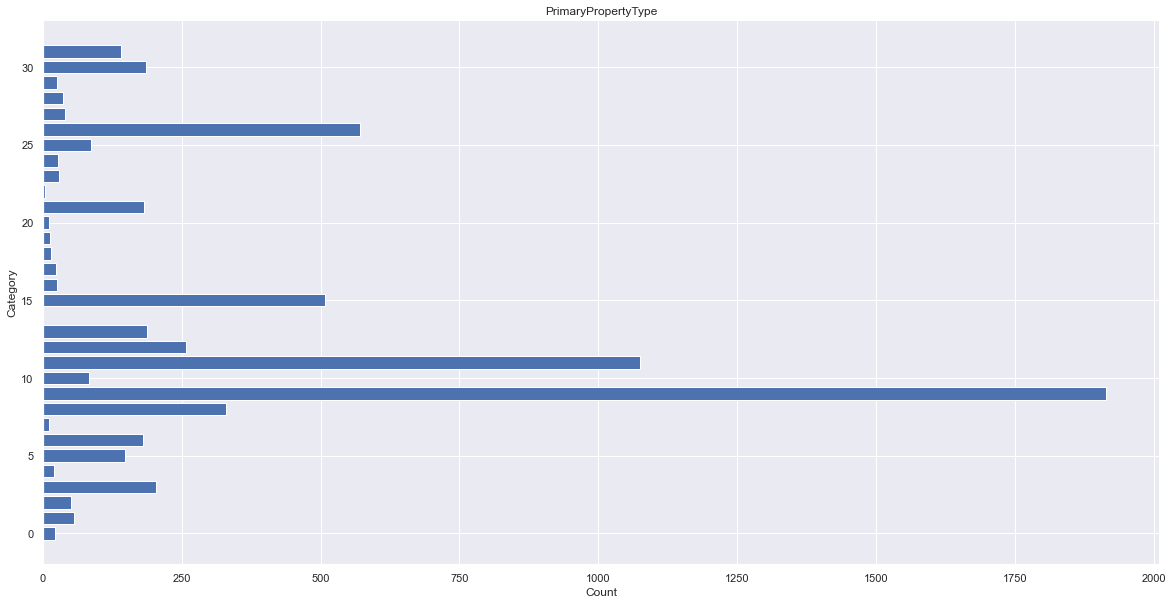

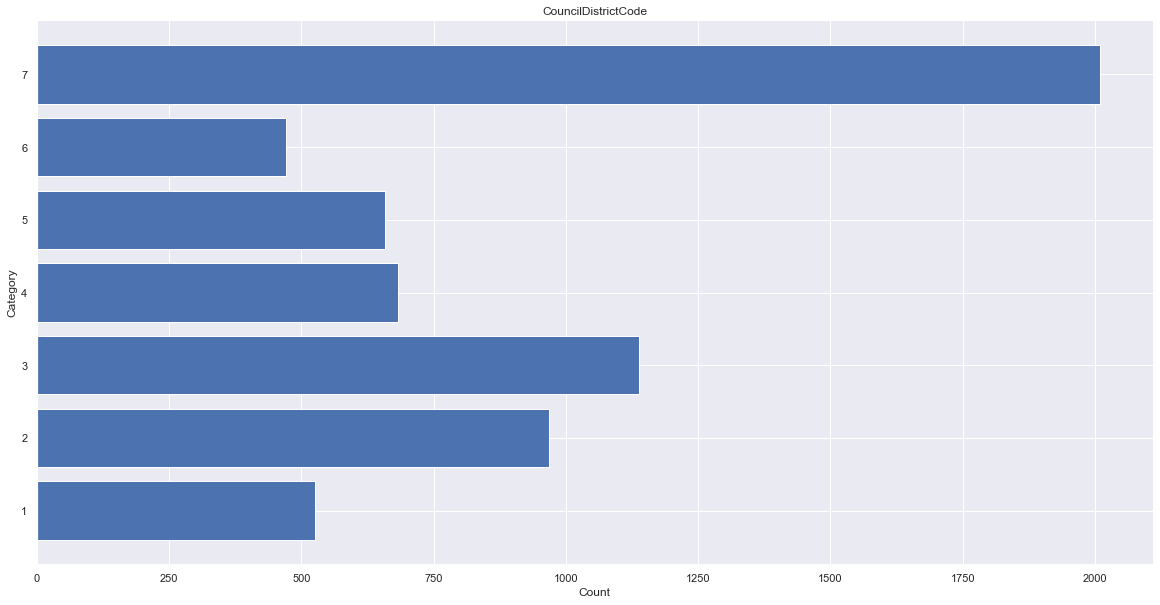

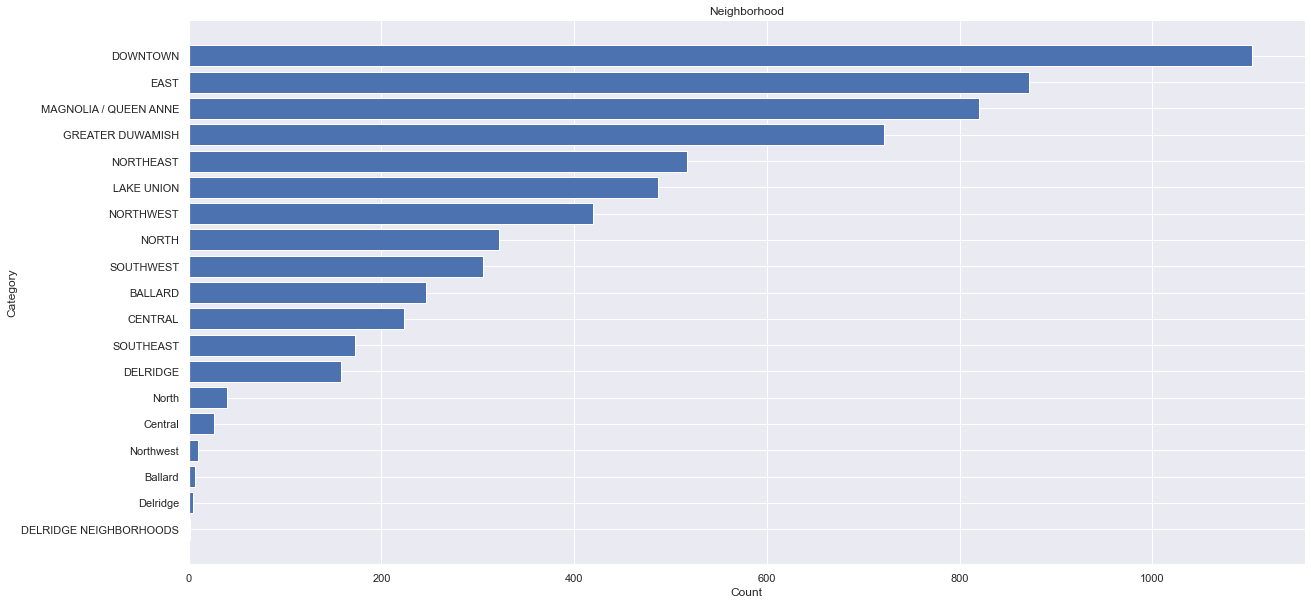

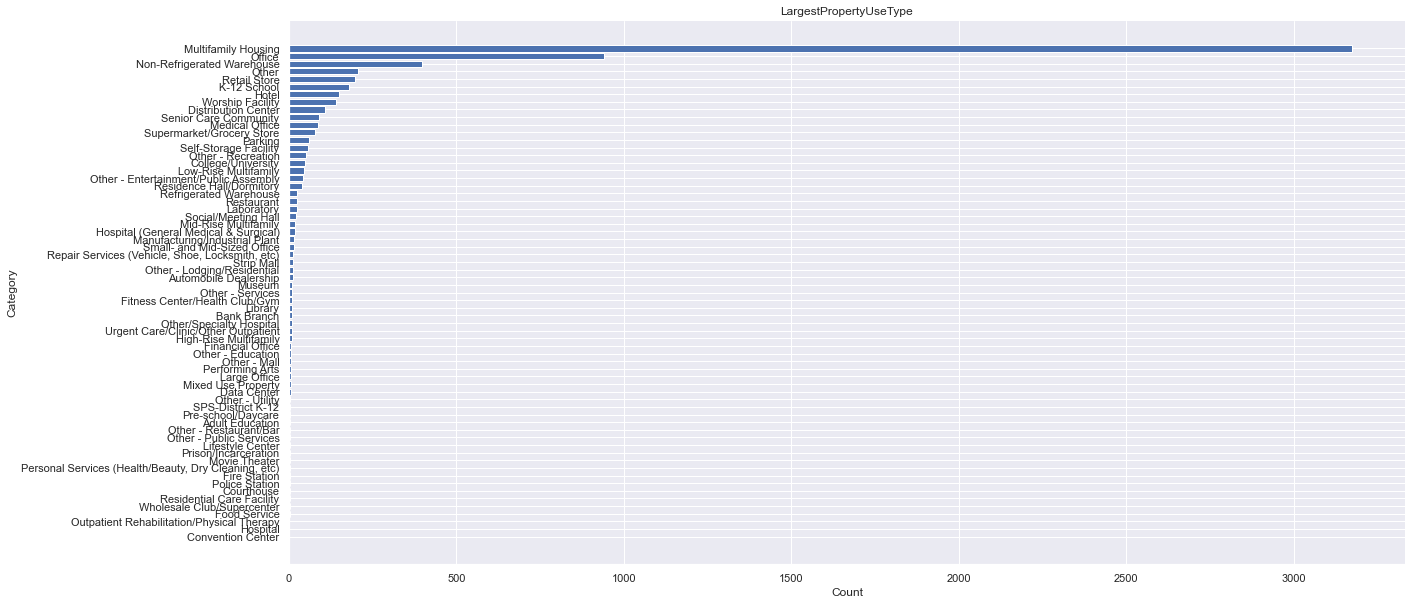

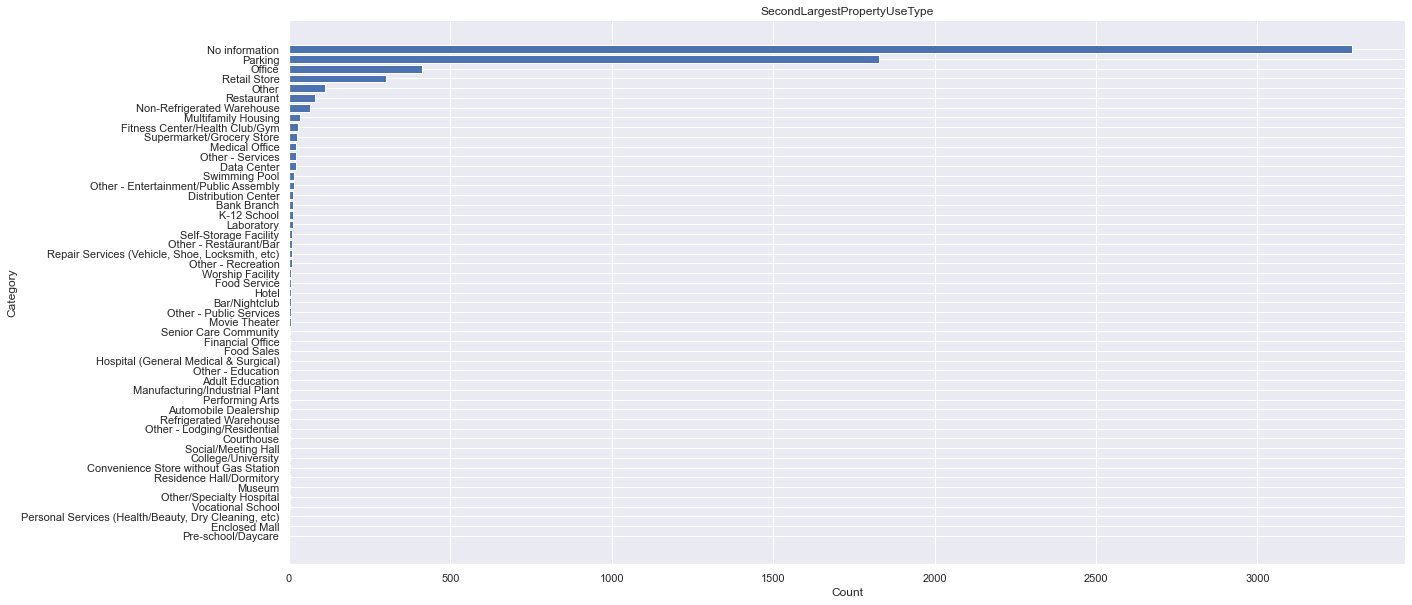

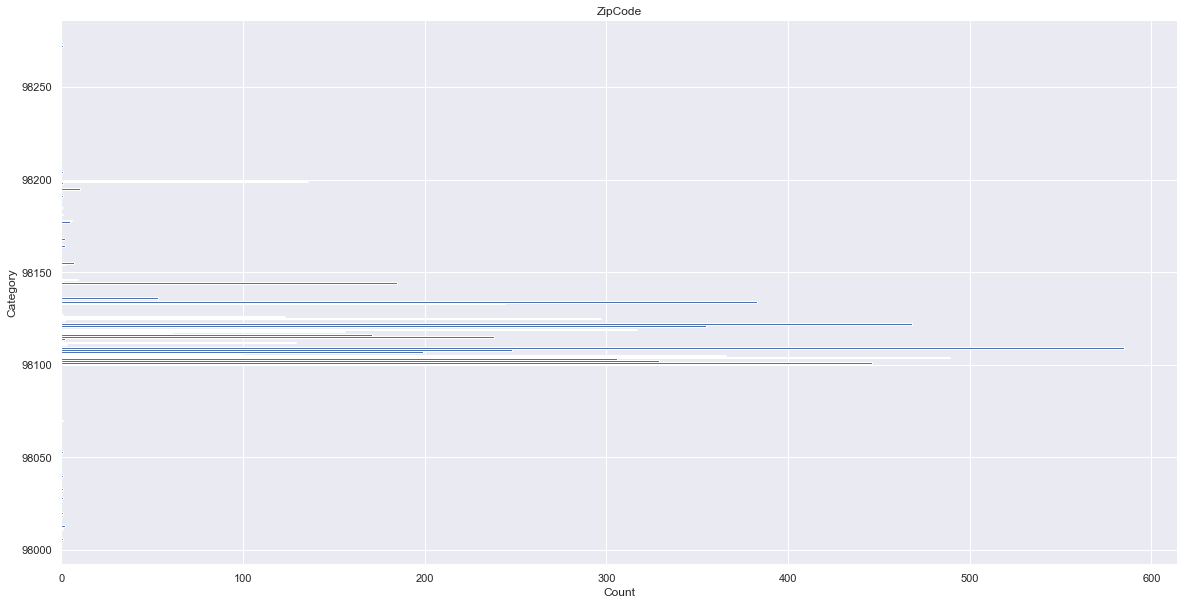

In [102]:
categorical_columns = data.select_dtypes(include = ['category', 'object']).columns
for col in categorical_columns:
    plt.figure(figsize=(20,10))   
    plt.barh(width=data.groupby(col).count().reset_index()['OSEBuildingID'].sort_values(), y = data.groupby(col)['OSEBuildingID'].count().reset_index().sort_values(by = 'OSEBuildingID')[col])
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('Category')
    sns.despine()
    plt.show()

## Analyse bivariée

### Matrice de corrélation

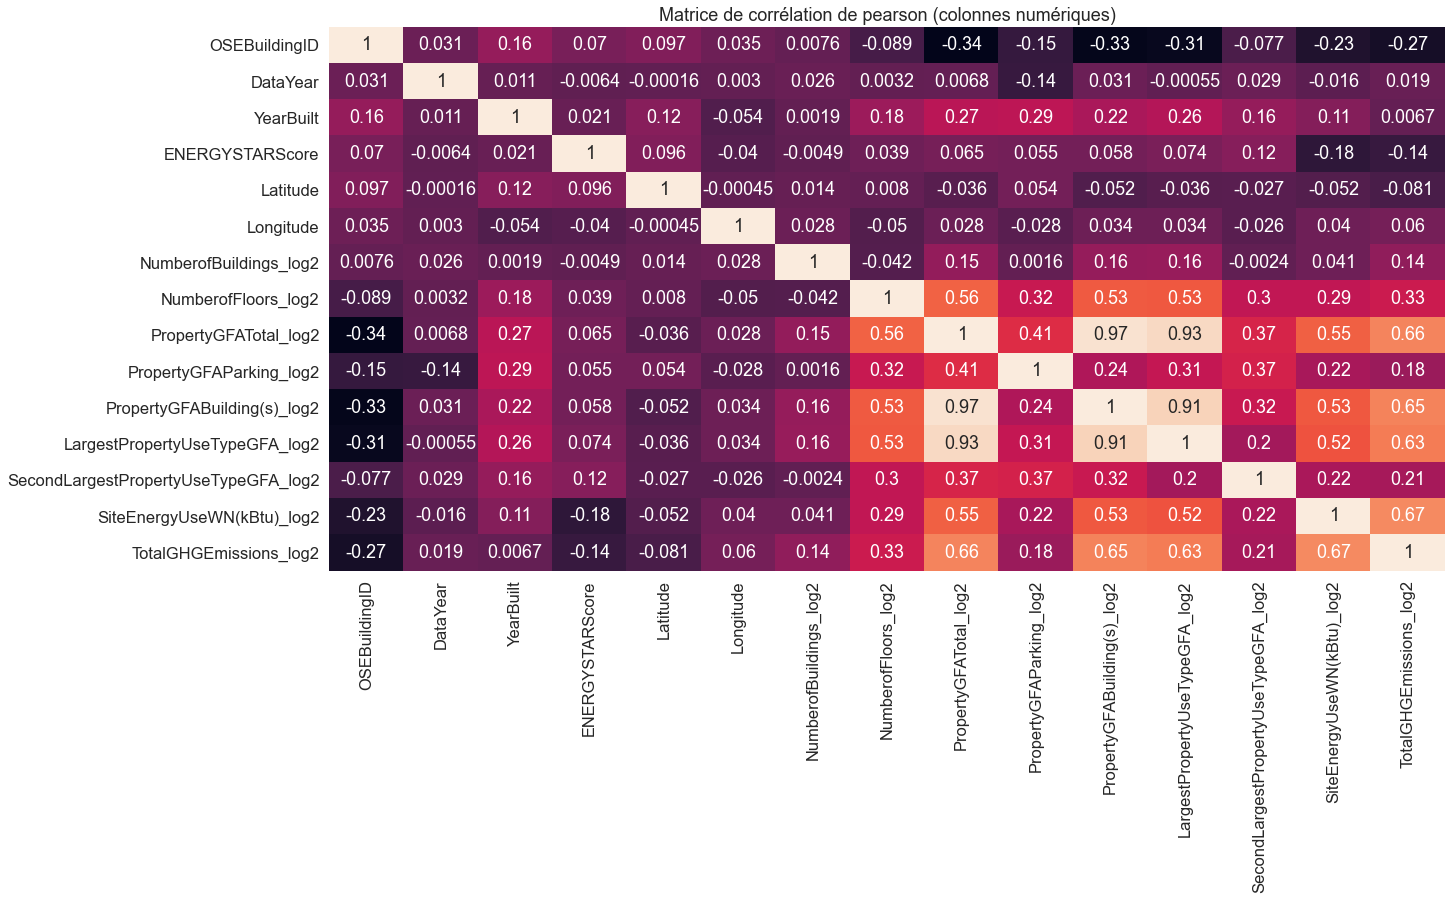

In [145]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson (colonnes numériques)')
numeric_columns = data.select_dtypes(['int64', 'float64']).columns.tolist()
corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

**Observations**
* Corrélation importante entre : PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
* Corrélation importante entre PropertyGBABuilding(s) et LargestPropertyUseTypeGFA
* **4 colonnes semblent êtres assez corrélées aux variables target : PropertyGFATotal, PropertyGFABuilding, LargestPropertyUseTypeGFA et SecondLargestPropertyUseTypeGFA. D'autres variables semblent avoir plus d'impact sur la consommation totale que sur les émissions de gaz à effet de serre (ex: PropertyGFAParking)

### Liens entres les variables catégorielles et les variables target (test ANOVA)

In [79]:
def eta_squared(x,y, column):
    print()
    moyenne_y = y.mean()
    classes = []
    a = x.unique().tolist()    
    for classe in a:
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    anova_score = SCE/SCT
    print(f'{column:-<50}{anova_score}')
    print('')

In [113]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [81]:
target_columns = ['TotalGHGEmissions_log2' , 'SiteEnergyUseWN(kBtu)_log2']
categorical_columns = data.select_dtypes(include = ['category', 'object']).columns
for catcol in categorical_columns:
    for tarcol in target_columns:
        print(f'lien avec {tarcol}')
        eta_squared(data[catcol].dropna(), data[tarcol].dropna(), catcol)

lien avec TotalGHGEmissions_log2

BuildingType--------------------------------------0.20709908086254994

lien avec SiteEnergyUseWN(kBtu)_log2

BuildingType--------------------------------------0.09034273004031103

lien avec TotalGHGEmissions_log2

PrimaryPropertyType-------------------------------0.35955428416297347

lien avec SiteEnergyUseWN(kBtu)_log2

PrimaryPropertyType-------------------------------0.19796326396189998

lien avec TotalGHGEmissions_log2

CouncilDistrictCode-------------------------------0.0438052522018026

lien avec SiteEnergyUseWN(kBtu)_log2

CouncilDistrictCode-------------------------------0.021625872243914983

lien avec TotalGHGEmissions_log2

Neighborhood--------------------------------------0.0803033947531964

lien avec SiteEnergyUseWN(kBtu)_log2

Neighborhood--------------------------------------0.04699131845837242

lien avec TotalGHGEmissions_log2

LargestPropertyUseType----------------------------0.2508908731279904

lien avec SiteEnergyUseWN(kBtu)_log2

Lar


Les seules variables catégorielles ne semblant pas être indépendant des variables target sont les colonnes LargestPropertyUseType et PrimaryPropertyType. Etonnamment la colonne Building type semble être indépendant de nos deux colonnes target.

## Code 

In [2]:
import json  
from pandas.io.json import json_normalize 
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
import ast
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)
columns_2016_to_drop = [
                   'City', #1 unique valeur
                   'State', #1 unique valeur
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes    
                   'DefaultData', #utilité de la variable inconnue
                   'Address', #non conservé (latitude et longitude ou ZipCode)
                   'NaturalGas(therms)',
    'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)','SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity'
                  ] 
columns_2015_to_drop = ['OtherFuelUse(kBtu)',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes',
                   'PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes', #donnée figurant dans d'autres colonnes                   
                   'SPD Beats', #données police / trop d'infos manquantes
                   'DefaultData',
                   'NaturalGas(therms)',
                        'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)'
                  ] 
def filter_columns(data, columns_list):
    data.drop(columns=columns_list, inplace=True)
    
def getColumnsToDel(data, seuil):
    columnsToDel = []
    for col in data.columns:         
        txNaN = data[col].isna().sum()/data.shape[0]
        if txNaN > seuil:
            columnsToDel.append(col)            
    return columnsToDel 

def delColumns(data, columnsList):    
    data.drop(columns=columnsList, inplace=True)
    
def transform_columns (dataframe):           
    #ajout des informations des colonnes manquantes
    location = pd.DataFrame()
    for line, building_id in zip(dataframe['Location'], dataframe['OSEBuildingID']):
        line = ast.literal_eval(line)
        line = json_normalize(line)
        
        latitude = line['latitude'][0]
        longitude = line['longitude'][0]

        line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
        location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,                       
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
    return pd.merge(dataframe, location, left_on = 'OSEBuildingID', 
                    right_on = 'Building_id').drop(['Building_id','Location'],axis=1)

def imputeByKNN(data, columnsList, targetColumn):
    X= data[columnsList]
    imputer = KNNImputer(n_neighbors=2)
    X = imputer.fit_transform(X)
    X = pd.DataFrame(X, columns=[columnsList])
    X [targetColumn] = X[targetColumn].astype('int64')
    return X[targetColumn]



def imputeByKNN(data, columnsList, targetColumn):
    X= data[columnsList]
    imputer = KNNImputer(n_neighbors=2)
    X = imputer.fit_transform(X)
    X = pd.DataFrame(X, columns=[columnsList])
    X [targetColumn] = X[targetColumn].astype('int64')
    return X[targetColumn]

def delete_NaN_from_energyCol(data):
    for index in data[data['TotalGHGEmissions'].isna()].index.tolist():
        data.drop(data[data.index == index].index, inplace=True)
    
    

def fillLargestPrimaryUseTypeAndGFA(data):
    data['LargestPropertyUseType'] = data['LargestPropertyUseType'].astype('string')
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('string')
    for index in data[data['LargestPropertyUseType'].isna()].index.tolist():        
        data.at[index, 'LargestPropertyUseType'] = ''.join(map(str,data[data.index == index]['PrimaryPropertyType'].values))
    for index in data[data['PropertyGFABuilding(s)'] < 0].index.tolist():        
        data.at[index, 'PropertyGFABuilding(s)'] = 0    
    data['LargestPropertyUseTypeGFA'].fillna(data['LargestPropertyUseTypeGFA'].dropna().mean(), inplace=True)  
    data['LargestPropertyUseType'] = data['LargestPropertyUseType'].astype('category')
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('category')
    return data
    
def logTransformTarget(data):
    numeric_columns = data.select_dtypes(include = ['int32','int64','float64']).columns
    highSkewed_columns = [] 
    for column in numeric_columns:        
        skewness = data[column].skew()
        print(f'{column:-<50}{skewness}')
        if skewness > 1:
            highSkewed_columns.append(column)
    print(highSkewed_columns)    
    for col in highSkewed_columns:    
        newColName = col + '_log2'
        data[newColName] = np.log2(10 + data[col])
        data.drop(columns=[col], inplace=True)
    return data
    
def fillNaNOutlierAndPropertyUse(data_2015, data_2016):
    data_2015['Outlier'].fillna('Non Outlier', inplace=True)
    data_2016['Outlier'].fillna('Non Outlier', inplace=True)
    data_2015['SecondLargestPropertyUseType'].fillna('No information', inplace=True)
    data_2015['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
    data_2016['SecondLargestPropertyUseType'].fillna('No information', inplace=True)
    data_2016['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
    
def redefineColumnType(data):
    data['Longitude'] = data['Longitude'].astype('float64')
    data['Latitude'] = data['Latitude'].astype('float64')
    data['NumberofBuildings'] = data['NumberofBuildings'].astype('int64')
    return data
    
def consolidateData(data_2015, data_2016):
    data_2015 = transform_columns(data_2015)
    data = pd.concat([data_2015, data_2016], axis=0, sort=False)
    data.reset_index(inplace=True)
    data.drop(columns=['index'], inplace=True)
    data['ZipCode'] = imputeByKNN(data, ['Latitude', 'Longitude', 'ZipCode'], 'ZipCode')
    return data
    
def delColByThreshold(data_2015, data_2016, seuil):
    columnsToDel_2015 = getColumnsToDel(data_2015, seuil)
    columnsToDel_2016 = getColumnsToDel(data_2016, seuil)    
    delColumns(data_2015, columnsToDel_2015)
    delColumns(data_2016, columnsToDel_2016)
    
def fillNaNNumberOfFloors(data):
    data_copy = data.copy()
    label = LabelEncoder()    
    propertycat = data_copy['PrimaryPropertyType'].values.tolist()
    data_copy['PrimaryPropertyType'] = label.fit_transform(propertycat)    
    data['NumberofFloors'] = imputeByKNN(data_copy, ['PrimaryPropertyType', 'NumberofBuildings','NumberofFloors'], 'NumberofFloors')
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('category')
    data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('category')
    data['ZipCode'] = data['ZipCode'].astype('category')
    delete_NaN_from_energyCol(data) 
    return data

def harmonizeGHGEmission(data_2015):
    data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
    data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)
    
def deleteOutliers(data):
    data.drop(data[~(data['Outlier'] == 'Non Outlier')].index, inplace=True)
    data.drop(columns=['Outlier'], inplace=True)
    a = data.select_dtypes(include = ['int32','float64']).columns.tolist()
    a.remove('Longitude')
    for col in a:
        data.drop(data[data[col] <0].index, inplace=True)
    
def clean_data():
    # Récupération des données
    data_2015 = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\2015-building-energy-benchmarking.csv')
    data_2016 = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\archive\\2016-building-energy-benchmarking.csv')
    # Supprimer les colonnes non pertinentes niveau métier pour notre analyse
    filter_columns(data_2015, columns_2015_to_drop)
    filter_columns(data_2016, columns_2016_to_drop)
    # Remplir les données non renseignées pour les colonnes Outlier, PropertyUse, SecondlargestUseType et SecondlargestUseTypeGFA
    # 'No information' pour les données catégorielles, 0 pour les colonnes GFA
    fillNaNOutlierAndPropertyUse(data_2015, data_2016)
    # Supprimer les colonnes contenant plus de 70% de NaN
    delColByThreshold(data_2015, data_2016, 0.7)
    # Harmonise le nom des colonnes GHGEmission pour le jeu de données 2015 
    harmonizeGHGEmission(data_2015)
    # Creation un unique jeu de données
    data = consolidateData(data_2015, data_2016)
    # KNN pour les NaN de NumberOfFloors en fonction du properyType du numberofbuildings et de la consommation en electricité
    data = fillNaNNumberOfFloors(data)
    # redefinition des bons types de données par colonne
    data = redefineColumnType(data)
    # LargestPrimaryType = PrimaryType pour les NaN, mean correspondant au type pour LargestPropertyUseTypeGFA
    data = fillLargestPrimaryUseTypeAndGFA(data) 
    # suppression des outliers (donnée catégorisée comme outlier et donnée numérique-en dehors de Longitude- inférieure à 0)
    deleteOutliers(data)
    # Réduction du tail de colonnes fortement skewed
    data = logTransformTarget(data)
    return data

data = clean_data()
data.to_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet4-Openclassrooms-master\\Projet4-Openclassrooms-master\\data_cleaned.csv', index=False)


OSEBuildingID--------------------------------------0.09847363347627451
DataYear-------------------------------------------0.026140063242910697
YearBuilt------------------------------------------0.5484062682827889
NumberofBuildings---------------------------------52.31602263098921
NumberofFloors------------------------------------5.9657126197035995
PropertyGFATotal----------------------------------20.682187693725332
PropertyGFAParking--------------------------------6.329215755980651
PropertyGFABuilding(s)----------------------------25.19040989977218
LargestPropertyUseTypeGFA-------------------------27.983617749552646
SecondLargestPropertyUseTypeGFA-------------------6.819031117648598
ENERGYSTARScore------------------------------------0.8552039366376315
SiteEnergyUseWN(kBtu)-----------------------------14.056826071705247
TotalGHGEmissions---------------------------------19.289128724639166
Latitude------------------------------------------0.14241857963272997
Longitude---------------------

In [124]:
data[data['PropertyGFABuilding(s)_log2'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,ComplianceStatus,ZipCode,Latitude,Longitude,NumberofBuildings_log2,NumberofFloors_log2,PropertyGFATotal_log2,PropertyGFAParking_log2,PropertyGFABuilding(s)_log2,LargestPropertyUseTypeGFA_log2,SecondLargestPropertyUseTypeGFA_log2,SiteEnergyUseWN(kBtu)_log2,TotalGHGEmissions_log2,GHGEmissionsIntensity_log2


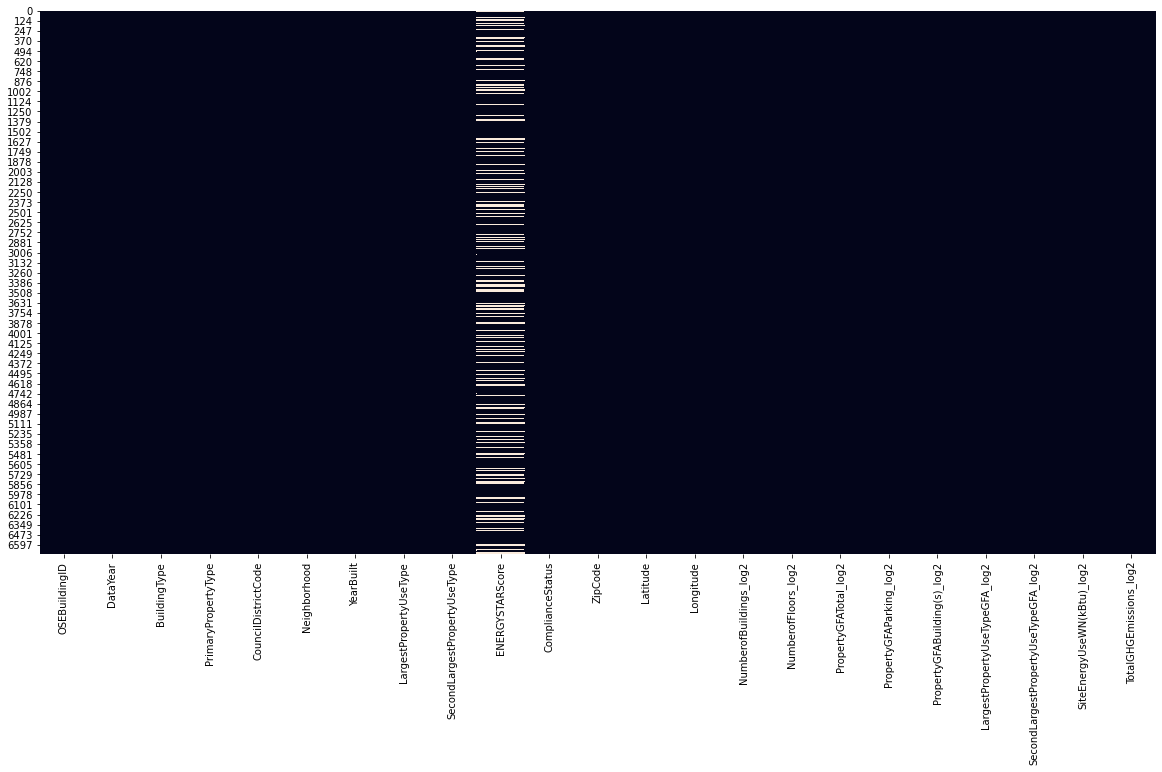

In [3]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [136]:
data.drop(data[data['SiteEnergyUseWN(kBtu)_log2'].isna()].index)

(6581, 23)

In [143]:
data.shape

(6582, 23)

In [144]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ENERGYSTARScore', 'ComplianceStatus', 'ZipCode', 'Latitude',
       'Longitude', 'NumberofBuildings_log2', 'NumberofFloors_log2',
       'PropertyGFATotal_log2', 'PropertyGFAParking_log2',
       'PropertyGFABuilding(s)_log2', 'LargestPropertyUseTypeGFA_log2',
       'SecondLargestPropertyUseTypeGFA_log2', 'SiteEnergyUseWN(kBtu)_log2',
       'TotalGHGEmissions_log2'],
      dtype='object')